# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from math import sqrt

from scipy import stats

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.stattools import durbin_watson

from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

from itertools import combinations

from datetime import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading the data

In [2]:
data = pd.read_excel('Data.xlsx')

# Adding date column and making it the index

In [3]:
# Convert 'Year' and 'Month' to a datetime format
data['Date'] = pd.to_datetime(data['Year'].astype(str) + ' ' + data['Month'], format='%Y %b')

# Drop the original 'Year' and 'Month' columns as they are now redundant
data.drop(['Year', 'Month'], axis=1, inplace=True)

In [4]:
# Set the 'Date' column as the index of the DataFrame
data.set_index('Date', inplace=True)

In [5]:
data

Unemployment Rate (Percent)  \
Date                                      
2000-12-01                          3.9   
2001-01-01                          4.2   
2001-02-01                          4.2   
2001-03-01                          4.3   
2001-04-01                          4.4   
...                                 ...   
2023-08-01                          3.8   
2023-09-01                          3.8   
2023-10-01                          3.8   
2023-11-01                          3.7   
2023-12-01                          3.7   

            Civilian Labor Force (Thousands of people)  \
Date                                                     
2000-12-01                                      143248   
2001-01-01                                      143800   
2001-02-01                                      143701   
2001-03-01                                      143924   
2001-04-01                                      143569   
...                                                ...   
2023-08-01                                      167840   
2023-09-01                                      167897   
2023-10-01                                      167723   
2023-11-01                                      168127   
2023-12-01                                      167451   

            Hires level (Thousands of people)  \
Date                                            
2000-12-01                               5426   
2001-01-01                               5722   
2001-02-01                               5303   
2001-03-01                               5528   
2001-04-01                               5204   
...                                       ...   
2023-08-01                               5888   
2023-09-01                               5851   
2023-10-01                               5814   
2023-11-01                               5569   
2023-12-01                               5787   

            Separations level (Thousands of people)  \
Date                                                  
2000-12-01                                     5240   
2001-01-01                                     5842   
2001-02-01                                     5231   
2001-03-01                                     5566   
2001-04-01                                     5414   
...                                             ...   
2023-08-01                                     5609   
2023-09-01                                     5522   
2023-10-01                                     5630   
2023-11-01                                     5413   
2023-12-01                                     5419   

            Disposable Personal Income SAAR (Billions of Dollars)  \
Date                                                                
2000-12-01                                             7579.4       
2001-01-01                                             7651.7       
2001-02-01                                             7672.4       
2001-03-01                                             7696.3       
2001-04-01                                             7693.8       
...                                                       ...       
2023-08-01                                            20326.4       
2023-09-01                                            20392.5       
2023-10-01                                            20437.7       
2023-11-01                                            20513.5       
2023-12-01                                            20581.1       

            Personal Consumption Expenditures SAAR (Billions of Dollars)  \
Date                                                                       
2000-12-01                                             6952.2              
2001-01-01                                             6987.4              
2001-02-01                                             7001.8              
2001-03-01                                             6996.7    

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 277 entries, 2000-12-01 to 2023-12-01
Data columns (total 12 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Unemployment Rate (Percent)                                             277 non-null    float64
 1   Civilian Labor Force (Thousands of people)                              277 non-null    int64  
 2   Hires level (Thousands of people)                                       277 non-null    int64  
 3   Separations level (Thousands of people)                                 277 non-null    int64  
 4   Disposable Personal Income SAAR (Billions of Dollars)                   277 non-null    float64
 5   Personal Consumption Expenditures SAAR (Billions of Dollars)            277 non-null    float64
 6   Personal Savings SAAR (Billions of Dollars)                    

In [7]:
data.describe()

Unemployment Rate (Percent)  \
count                   277.000000   
mean                      5.834657   
std                       1.977195   
min                       3.400000   
25%                       4.400000   
50%                       5.400000   
75%                       6.700000   
max                      14.800000   

       Civilian Labor Force (Thousands of people)  \
count                                  277.000000   
mean                                155360.057762   
std                                   6292.792545   
min                                 143248.000000   
25%                                 151716.000000   
50%                                 154866.000000   
75%                                 160395.000000   
max                                 168127.000000   

       Hires level (Thousands of people)  \
count                         277.000000   
mean                         5179.776173   
std                           712.346424   
min                          3639.000000   
25%                          4678.000000   
50%                          5197.000000   
75%                          5581.000000   
max                          8136.000000   

       Separations level (Thousands of people)  \
count                               277.000000   
mean                               5088.490975   
std                                 976.882714   
min                                3884.000000   
25%                                4690.000000   
50%                                5089.000000   
75%                                5400.000000   
max                               16805.000000   

       Disposable Personal Income SAAR (Billions of Dollars)  \
count                                         277.000000       
mean                                        12783.964260       
std                                          3551.821532       
min                                          7579.400000       
25%                                         10018.200000       
50%                                         12262.100000       
75%                                         15202.600000       
max                                         21858.100000       

       Personal Consumption Expenditures SAAR (Billions of Dollars)  \
count                                         277.000000              
mean                                        11565.780144              
std                                          3101.712844              
min                                          6952.200000              
25%                                          9375.400000              
50%                                         11016.800000              
75%                                         13703.300000              
max                                         19013.700000              

       Personal Savings SAAR (Billions of Dollars)  Manufacturing PMI  \
count                                   277.000000         277.000000   
mean                                    787.403610          52.729242   
std                                     679.518272           5.341678   
min                                     128.900000          33.300000   
25%                                     431.200000          50.000000   
50%                                     690.400000          52.800000   
75%                                     873.600000          56.600000   
max                                    5976.400000          64.700000   

       Manufacturing Employment Index  Services Employment Index  \
count                      277.000000                 277.000000   
mean                        50.643321                  51.570722   
std                          6.446817                   5.177822   
min                         26.400000                  30.000000   
25%                         47.500000                  49.100000   
50%                         51.700000                  

# Analysing the Target Variable

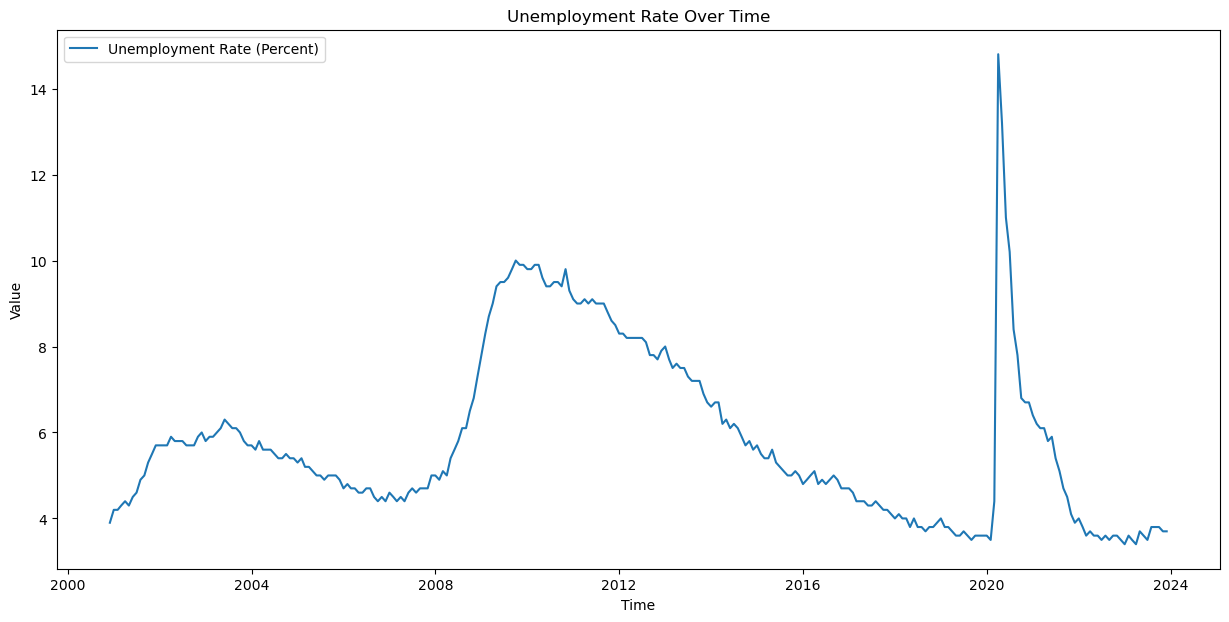

In [8]:

plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Unemployment Rate (Percent)'], label='Unemployment Rate (Percent)')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# ACF and PACF plots

<Figure size 1200x600 with 0 Axes>

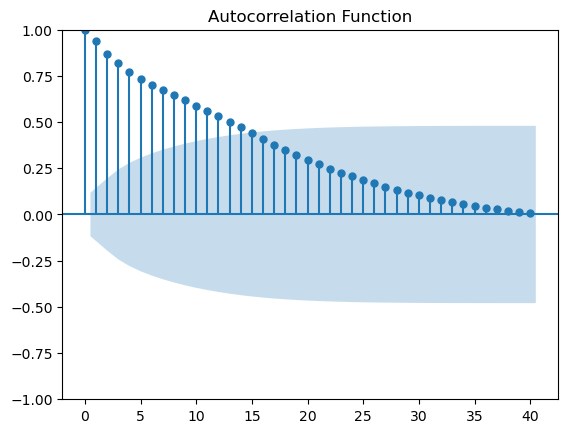

<Figure size 1200x600 with 0 Axes>

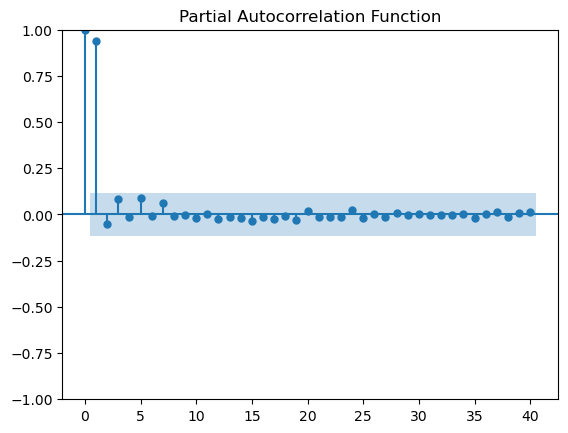

In [9]:
# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(data['Unemployment Rate (Percent)'], alpha=0.05, lags=40) 
plt.title('Autocorrelation Function')

# Plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(data['Unemployment Rate (Percent)'], alpha=0.05, lags=40) 
plt.title('Partial Autocorrelation Function')

plt.show()

In [10]:
# Perform the Dickey-Fuller test on the 'Unemployment Rate' time series
result = adfuller(data['Unemployment Rate (Percent)'])

# Create a more readable summary of the test
df_output = pd.Series(result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in result[4].items():
    df_output['Critical Value (%s)' % key] = value

print(df_output)

Test Statistic                  -2.892660
p-value                          0.046208
#Lags Used                       0.000000
Number of Observations Used    276.000000
Critical Value (1%)             -3.454267
Critical Value (5%)             -2.872070
Critical Value (10%)            -2.572381
dtype: float64


The p-value and test statistic from the Dickey-Fuller test suggest that the series is marginally stationary at a 5% level. However, the time plot and the ACF indicate non-stationarity due to the presence of trends and possibly changing variance. Given the non-stationary visual indicators and the marginal p-value, it's cautious to assume non-stationarity. Therefore, differencing is done.

In [11]:
data1 = data.copy()

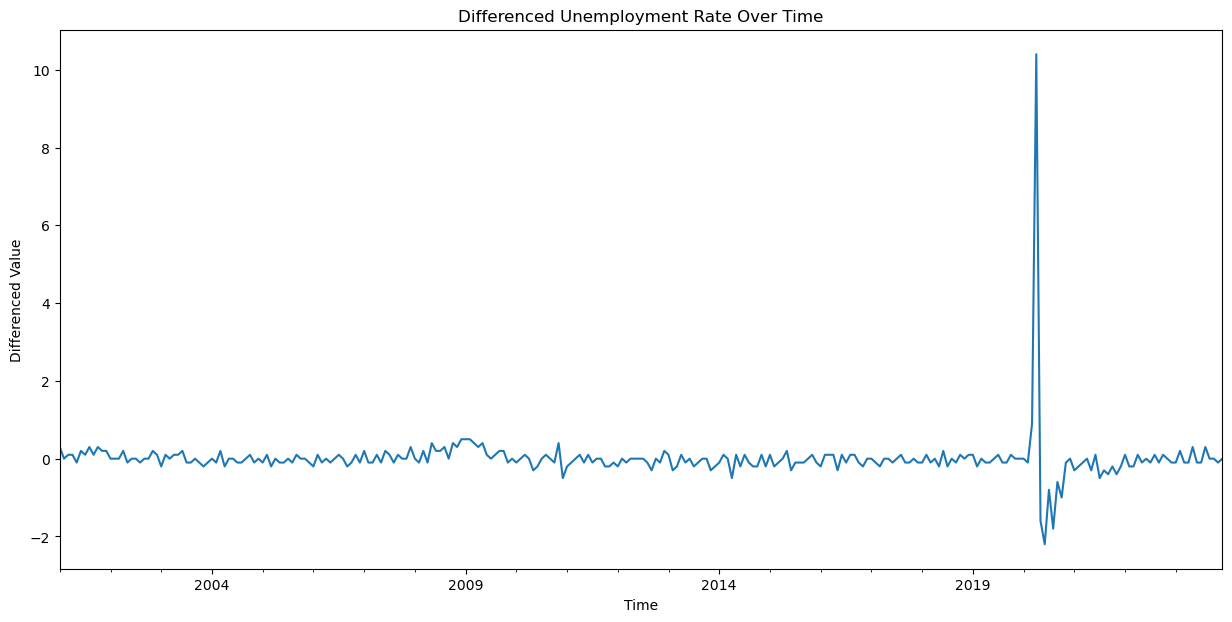

In [12]:
data1['Differenced_Target'] = data1['Unemployment Rate (Percent)'].diff()

# The first element of the differenced series will be NaN because there is nothing to subtract from the first element
# You can drop the NaN value or fill it if needed
data1 = data1.dropna()

# Plotting the differenced data
data1['Differenced_Target'].plot(figsize=(15, 7), title='Differenced Unemployment Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.show()

In [13]:
# Perform the Dickey-Fuller test on the 'Unemployment Rate' time series
result = adfuller(data1['Differenced_Target'])

# Create a more readable summary of the test
df_output = pd.Series(result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in result[4].items():
    df_output['Critical Value (%s)' % key] = value

print(df_output)

Test Statistic                -1.298227e+01
p-value                        2.926949e-24
#Lags Used                     1.000000e+00
Number of Observations Used    2.740000e+02
Critical Value (1%)           -3.454444e+00
Critical Value (5%)           -2.872147e+00
Critical Value (10%)          -2.572422e+00
dtype: float64


# Modelling without any exogenous variables

ACF Plot: Shows a gradual decline, which is typical for an AR process. However, after differencing, if the ACF plot drops off sharply after a lag, this would indicate the number of MA terms.

PACF Plot: Shows a significant spike at lag 1 and cuts off, which suggests an AR(1) process. The spike at lag 1 in the PACF plot typically indicates one AR term.

Based on this information, we can tentatively specify an ARIMA model. Since the data has been differenced once to achieve stationarity, the integrated component (I) is 1. The AR component (p) can be taken as 1 due to the spike in the PACF at lag 1. The MA component (q) can initially be taken as 0 since there is no significant spike in the ACF plot after the first lag that cuts off in the PACF plot.

This leads to an initial ARIMA model of (1,1,0). 

# Model 1 - ARIMA(1,1,0)

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


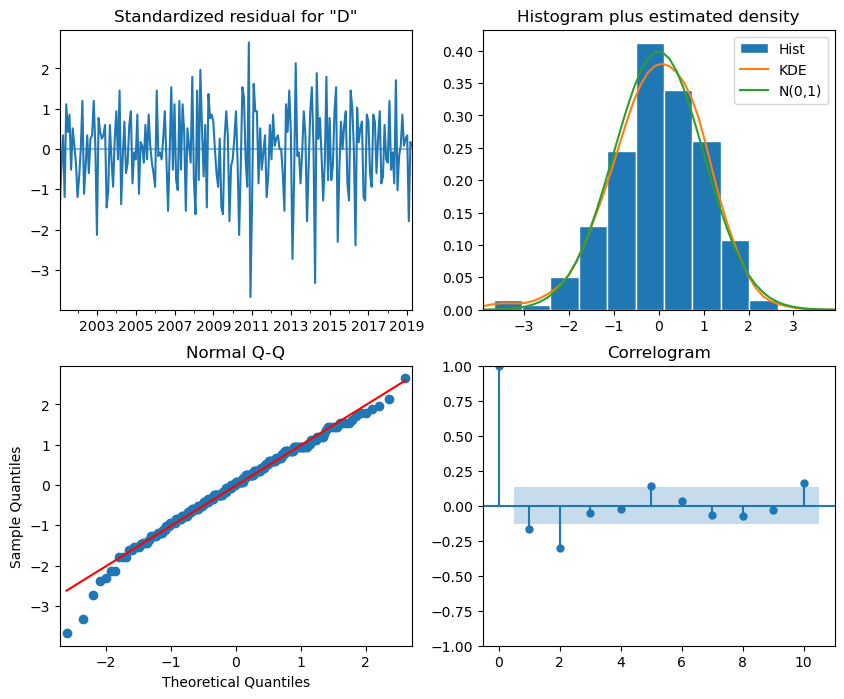

Dedifferenced forecasted values:
[3.6362954851242093, 3.572590970248418, 3.508886455372627, 3.445181940496836, 3.381477425621045, 3.3177729107452536, 3.2540683958694627, 3.1903638809936714, 3.12665936611788, 3.0629548512420888, 2.9992503363662975, 2.935545821490506]


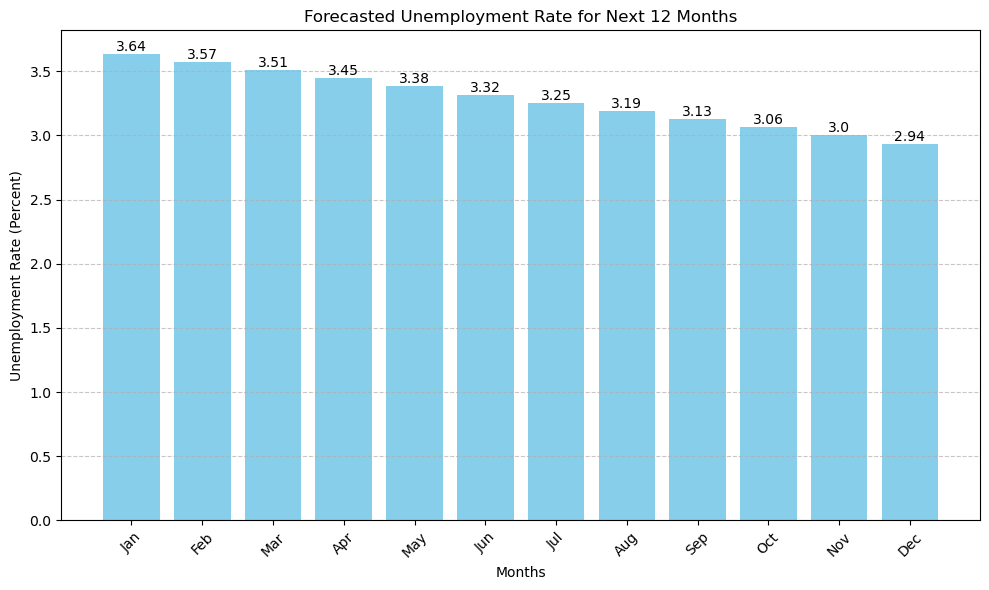

In [14]:
# 1. Split the Data
train_size = int(len(data1) * 0.8)  # 80% for training, 20% for testing
train, test = data1[0:train_size], data1[train_size:]

# 2. Fit the ARIMA Model
# Starting with parameters p=1, d=0, q=1
model = ARIMA(train['Differenced_Target'], order=(1,1,0))
model_fit = model.fit()

# 3. Model Diagnostics
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

# 4. Forecasting
forecast = model_fit.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean

# Assume 'original_data' contains your entire non-differenced dataset
last_actual_value = data['Unemployment Rate (Percent)'].iloc[-1]  # last value of the original dataset

# Forecast the next three values beyond the test set (as previously described)
total_steps = len(test) + 12
extended_forecast = model_fit.get_forecast(steps=total_steps)
extended_forecast_mean = extended_forecast.predicted_mean

# Dedifference forecast values
# Start with the last actual value from the original data
next_values = [last_actual_value + extended_forecast_mean.iloc[len(test)]]

# Now cumulatively add the forecasted differences to get absolute values
for i in range(1, 12):
    next_value = next_values[i-1] + extended_forecast_mean.iloc[len(test) + i]
    next_values.append(next_value)

print("Dedifferenced forecasted values:")
print(next_values)

# Months (you can replace these with actual month labels)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the bar chart with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(months, next_values, color='skyblue')
plt.title('Forecasted Unemployment Rate for Next 12 Months')
plt.xlabel('Months')
plt.ylabel('Unemployment Rate (Percent)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations on top of each bar
for bar, value in zip(bars, next_values):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             round(value, 2), 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_arr

Mean Absolute Error (MAE): 0.4462074812478952
The Mean Squared Error of the forecasts is 2.2023154774176867
The Root Mean Squared Error of the forecasts is 1.4840200394259124
AIC: -156.94341394890694
BIC: -150.16527048927392


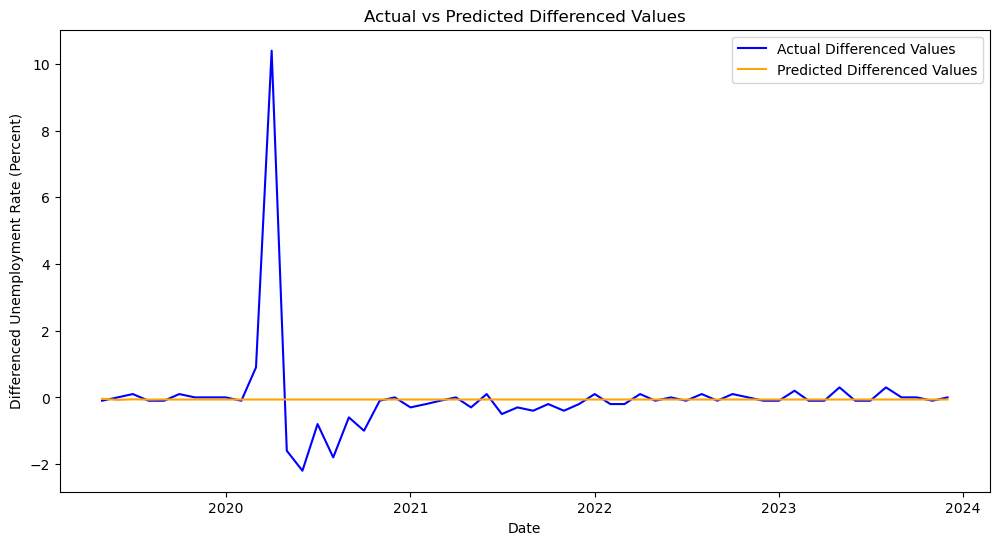

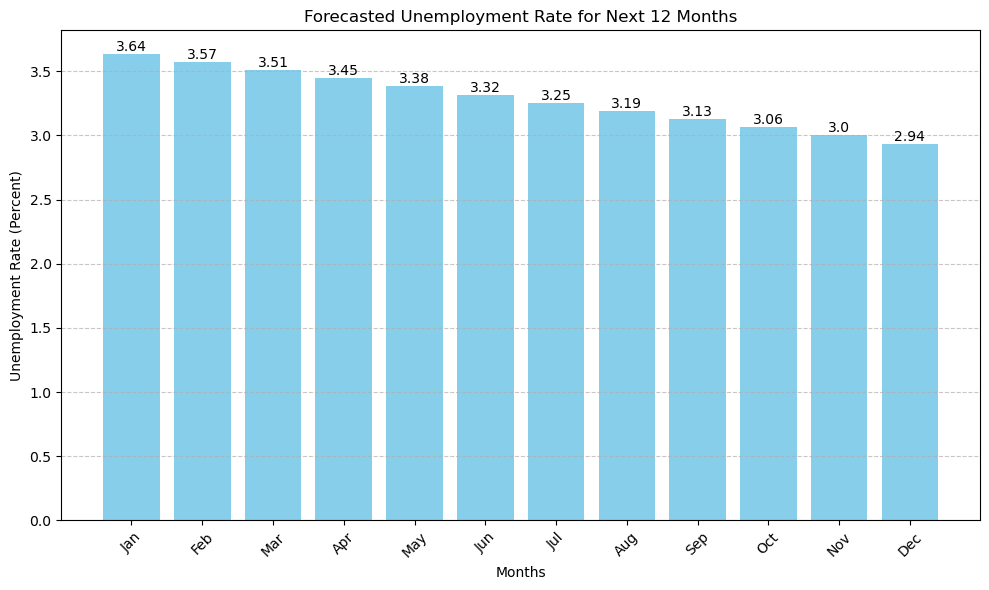

In [15]:
# Model Evaluation on the differenced scale
mse = mean_squared_error(test['Differenced_Target'], forecast_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Differenced_Target'], forecast_mean)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'The Mean Squared Error of the forecasts is {mse}')
print(f'The Root Mean Squared Error of the forecasts is {rmse}')

# Extract AIC and BIC values
aic = model_fit.aic
bic = model_fit.bic
print(f'AIC: {aic}')
print(f'BIC: {bic}')

# Plotting Actual vs. Predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Differenced_Target'], label='Actual Differenced Values', color='blue')
plt.plot(test.index, forecast_mean, label='Predicted Differenced Values', color='orange')
plt.title('Actual vs Predicted Differenced Values')
plt.xlabel('Date')
plt.ylabel('Differenced Unemployment Rate (Percent)')
plt.legend()
plt.show()


# Months (you can replace these with actual month labels)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the bar chart with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(months, next_values, color='skyblue')
plt.title('Forecasted Unemployment Rate for Next 12 Months')
plt.xlabel('Months')
plt.ylabel('Unemployment Rate (Percent)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations on top of each bar
for bar, value in zip(bars, next_values):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             round(value, 2), 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()


# Model 2 - ARIMA(1,1,1)

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


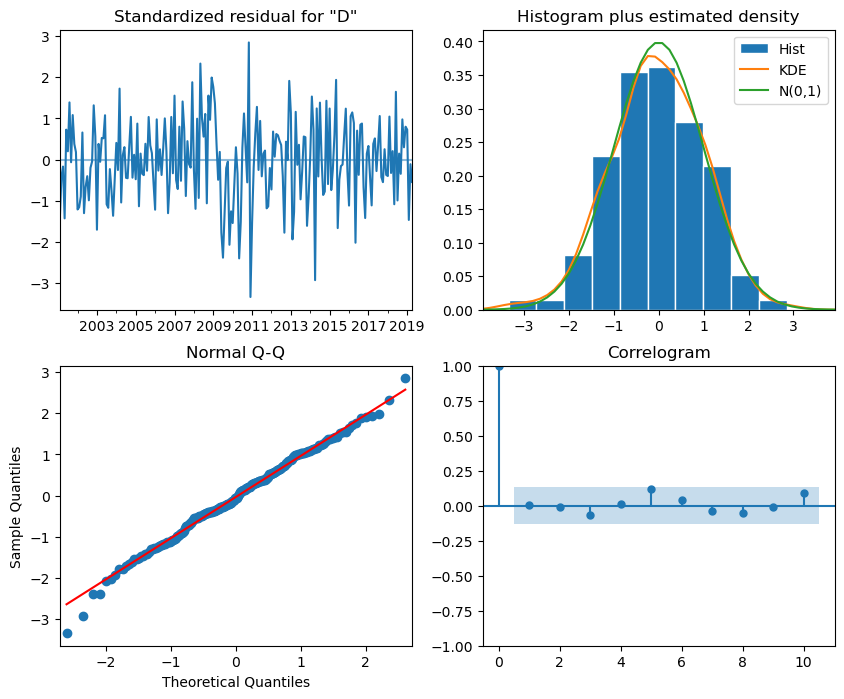

Dedifferenced forecasted values:
[3.667495797042706, 3.6349915940854114, 3.602487391128117, 3.5699831881708226, 3.537478985213528, 3.504974782256234, 3.4724705792989394, 3.439966376341645, 3.4074621733843506, 3.3749579704270563, 3.342453767469762, 3.3099495645124675]


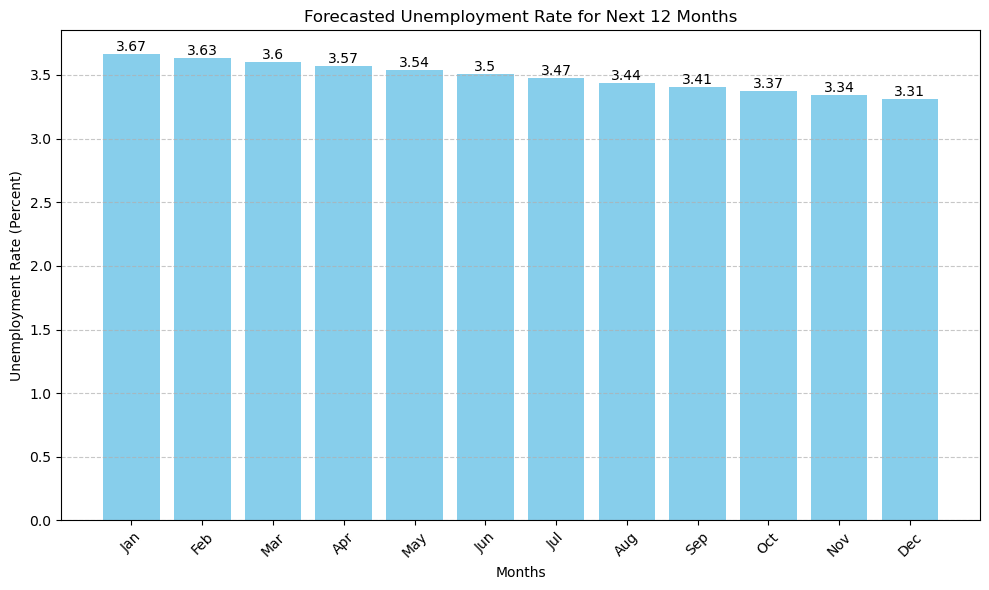

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_arr

Mean Absolute Error (MAE): 0.4515595779826184
The Mean Squared Error of the forecasts is 2.199299963851908
The Root Mean Squared Error of the forecasts is 1.4830036965064881
AIC: -208.92589363424344
BIC: -198.75867844479393


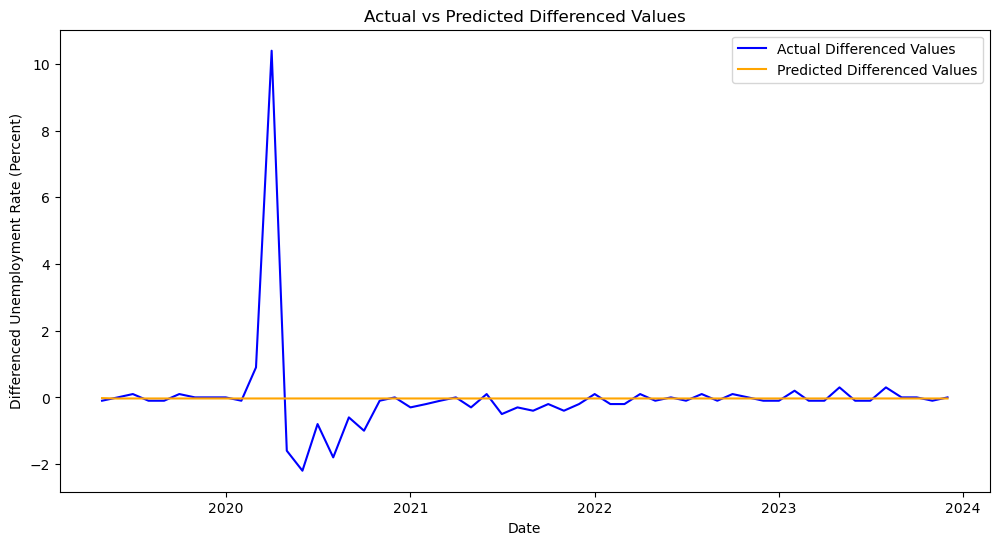

In [16]:
# 2. Fit the second ARIMA Model
# Starting with parameters p=1, d=1, q=1
model2 = ARIMA(train['Differenced_Target'], order=(1,1,1))
model2_fit = model2.fit()

# 3. Model Diagnostics
model2_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

# 4. Forecasting
forecast2 = model2_fit.get_forecast(steps=len(test))
forecast_mean2 = forecast2.predicted_mean

# Assume 'original_data' contains your entire non-differenced dataset
last_actual_value = data['Unemployment Rate (Percent)'].iloc[-1]  # last value of the original dataset

# Forecast the next three values beyond the test set (as previously described)
total_steps = len(test) + 12
extended_forecast = model2_fit.get_forecast(steps=total_steps)
extended_forecast_mean = extended_forecast.predicted_mean

# Dedifference forecast values
# Start with the last actual value from the original data
next_values = [last_actual_value + extended_forecast_mean.iloc[len(test)]]

# Now cumulatively add the forecasted differences to get absolute values
for i in range(1, 12):
    next_value = next_values[i-1] + extended_forecast_mean.iloc[len(test) + i]
    next_values.append(next_value)

print("Dedifferenced forecasted values:")
print(next_values)

# Months (you can replace these with actual month labels)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the bar chart with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(months, next_values, color='skyblue')
plt.title('Forecasted Unemployment Rate for Next 12 Months')
plt.xlabel('Months')
plt.ylabel('Unemployment Rate (Percent)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations on top of each bar
for bar, value in zip(bars, next_values):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             round(value, 2), 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()


# 5. Model Evaluation
mse2 = mean_squared_error(test['Differenced_Target'], forecast_mean2)
rmse2 = np.sqrt(mse2)
mae = mean_absolute_error(test['Differenced_Target'], forecast_mean2)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'The Mean Squared Error of the forecasts is {mse2}')
print(f'The Root Mean Squared Error of the forecasts is {rmse2}')

# Extract AIC and BIC values
aic2 = model2_fit.aic
bic2 = model2_fit.bic
print(f'AIC: {aic2}')
print(f'BIC: {bic2}')

# Plotting Actual vs. Predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Differenced_Target'], label='Actual Differenced Values', color='blue')
plt.plot(test.index, forecast_mean2, label='Predicted Differenced Values', color='orange')
plt.title('Actual vs Predicted Differenced Values')
plt.xlabel('Date')
plt.ylabel('Differenced Unemployment Rate (Percent)')
plt.legend()
plt.show()



# Exploratory Data Analysis of Exogenous variables

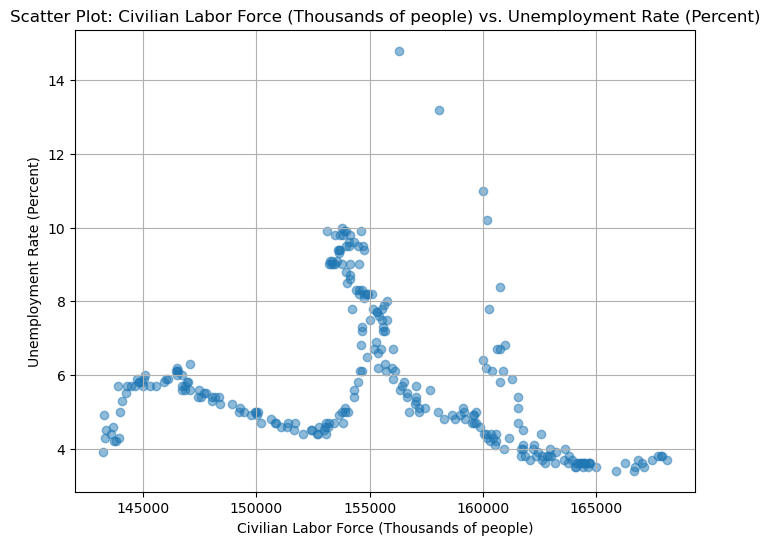

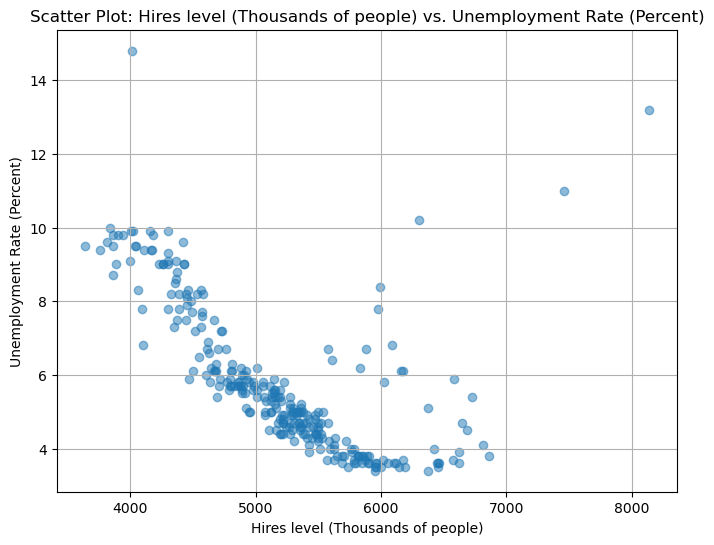

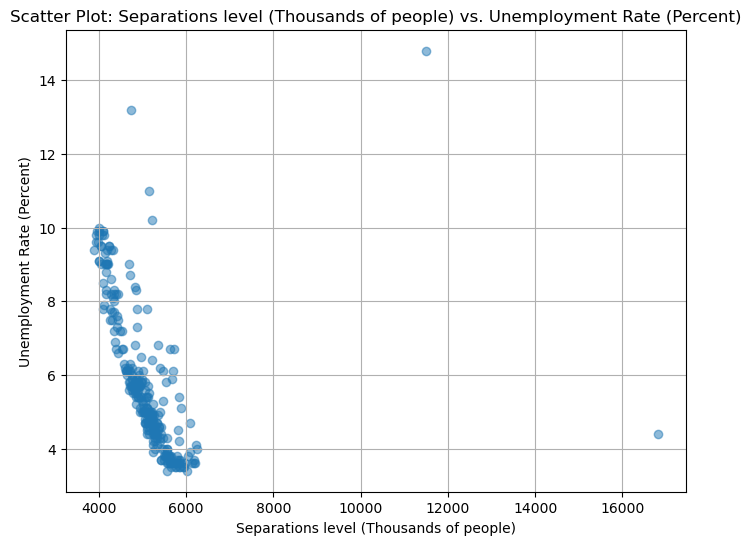

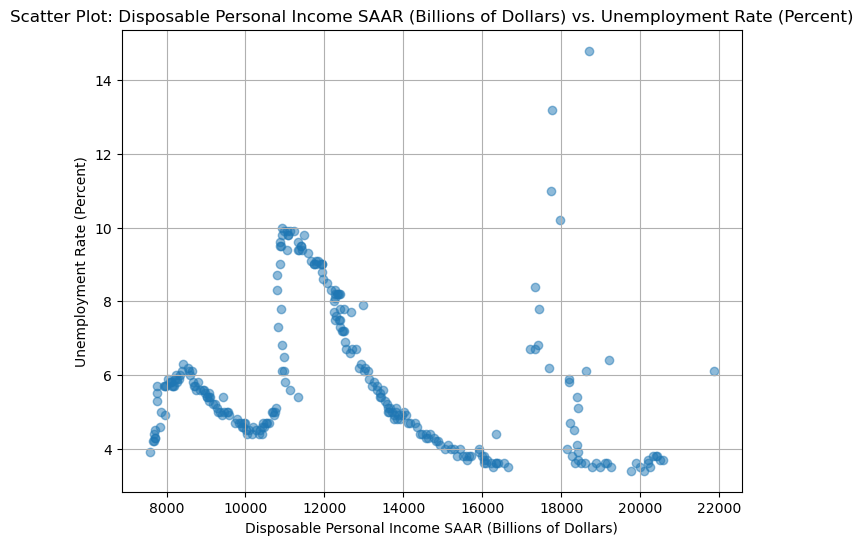

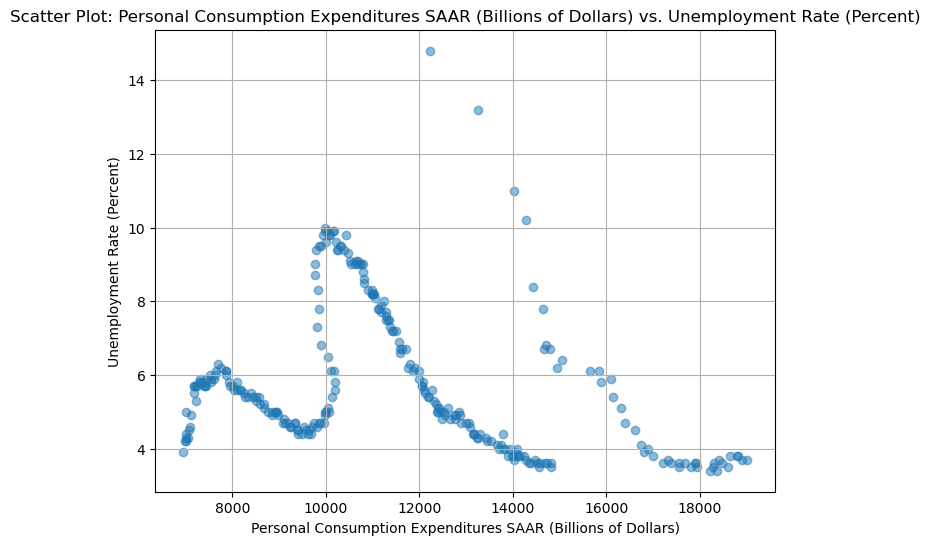

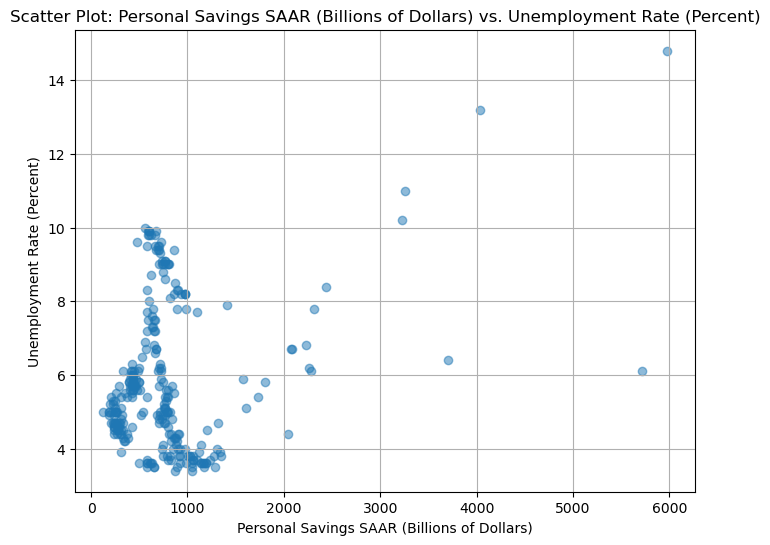

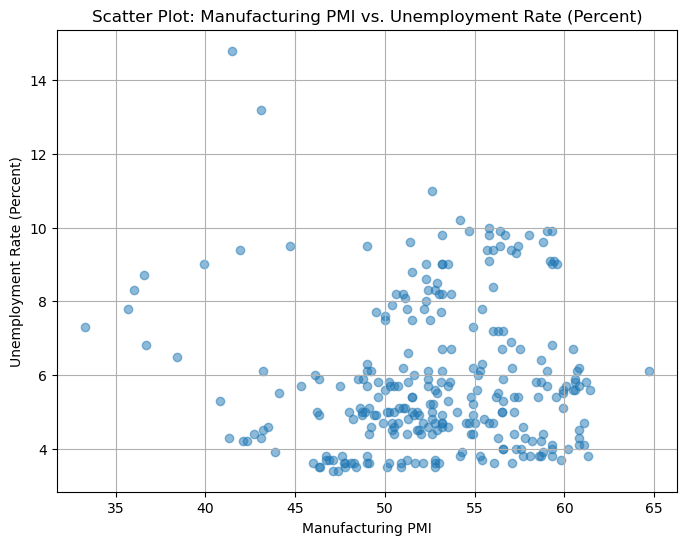

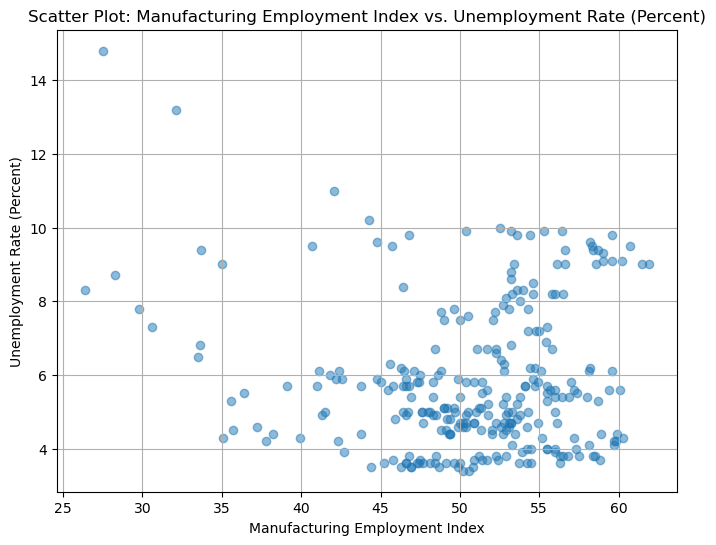

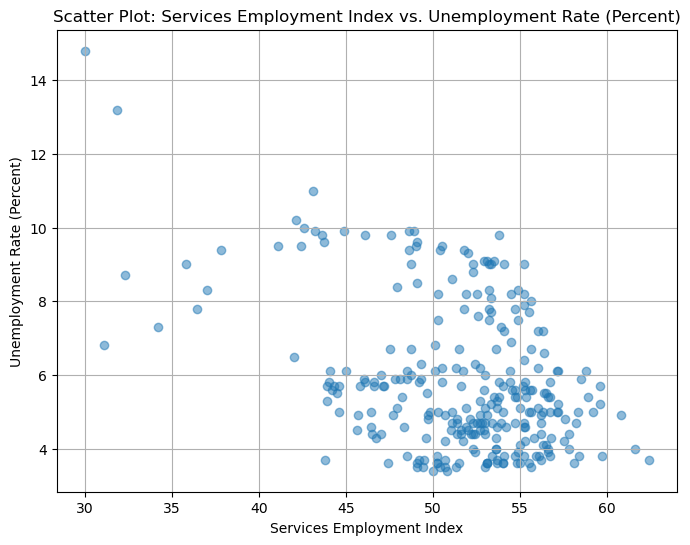

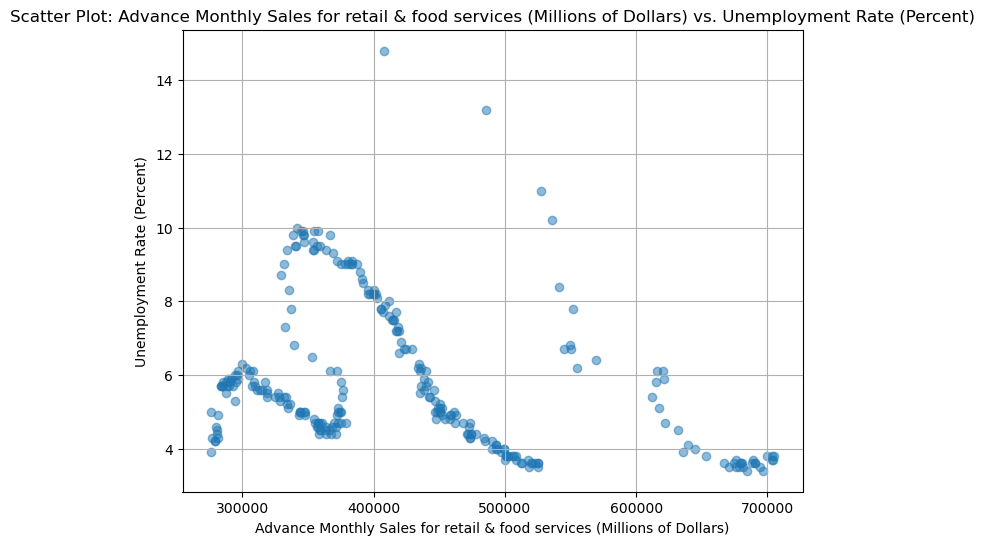

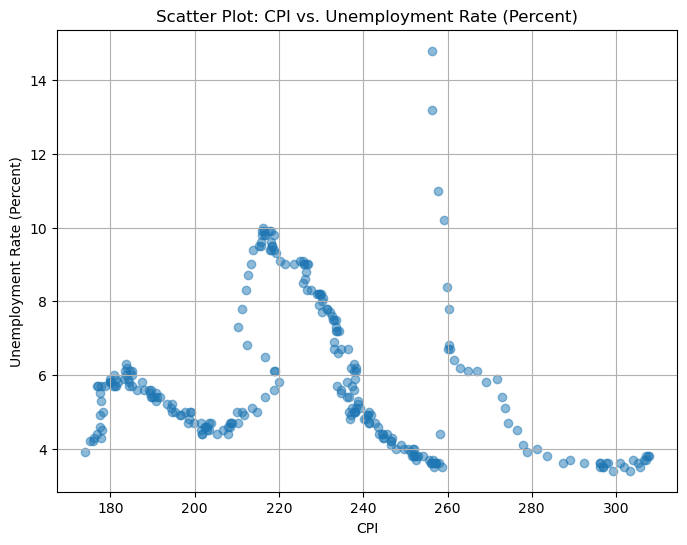

In [17]:
# Define the target variable
target_variable = 'Unemployment Rate (Percent)'

# Get the list of all variables except the target variable
exogenous_variables = data.columns[data.columns != target_variable]

# Create scatter plots for each exogenous variable against the target variable
for variable in exogenous_variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[variable], data[target_variable], alpha=0.5)
    plt.title(f'Scatter Plot: {variable} vs. {target_variable}')
    plt.xlabel(variable)
    plt.ylabel(target_variable)
    plt.grid(True)
    plt.show()

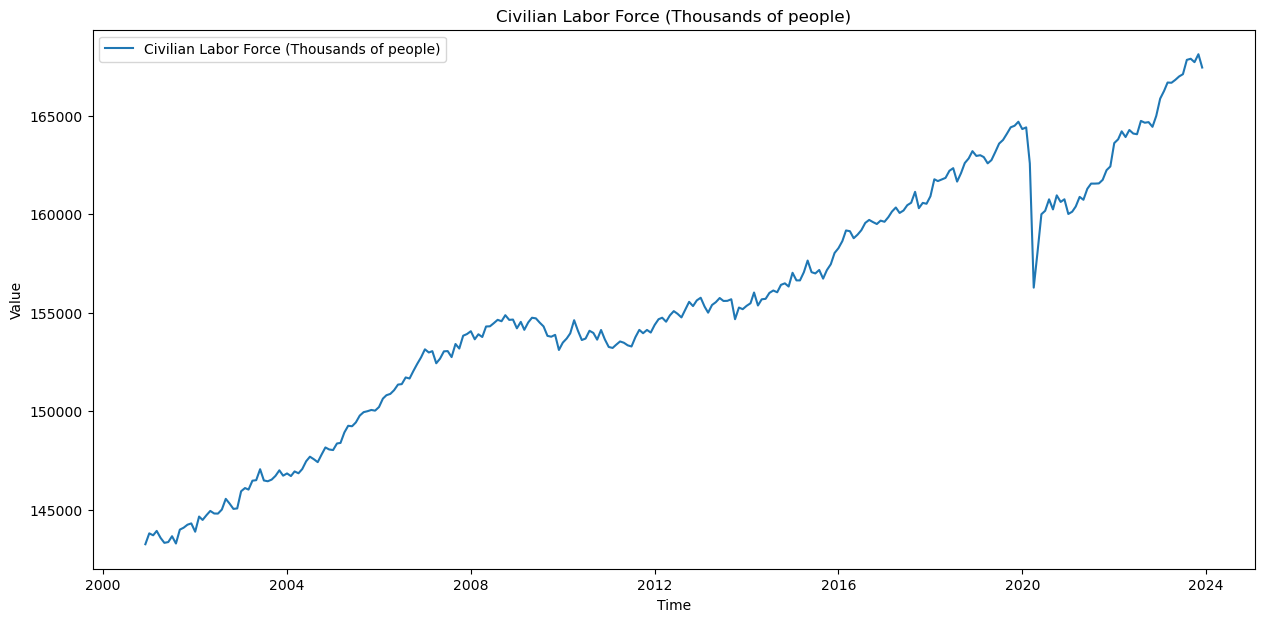

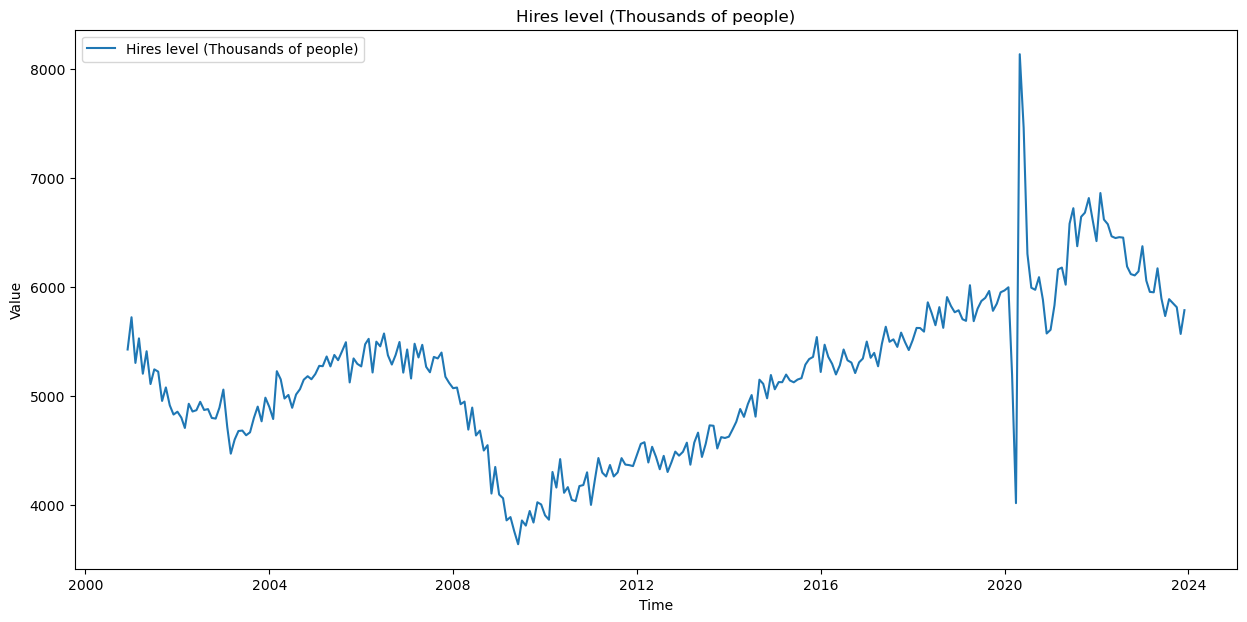

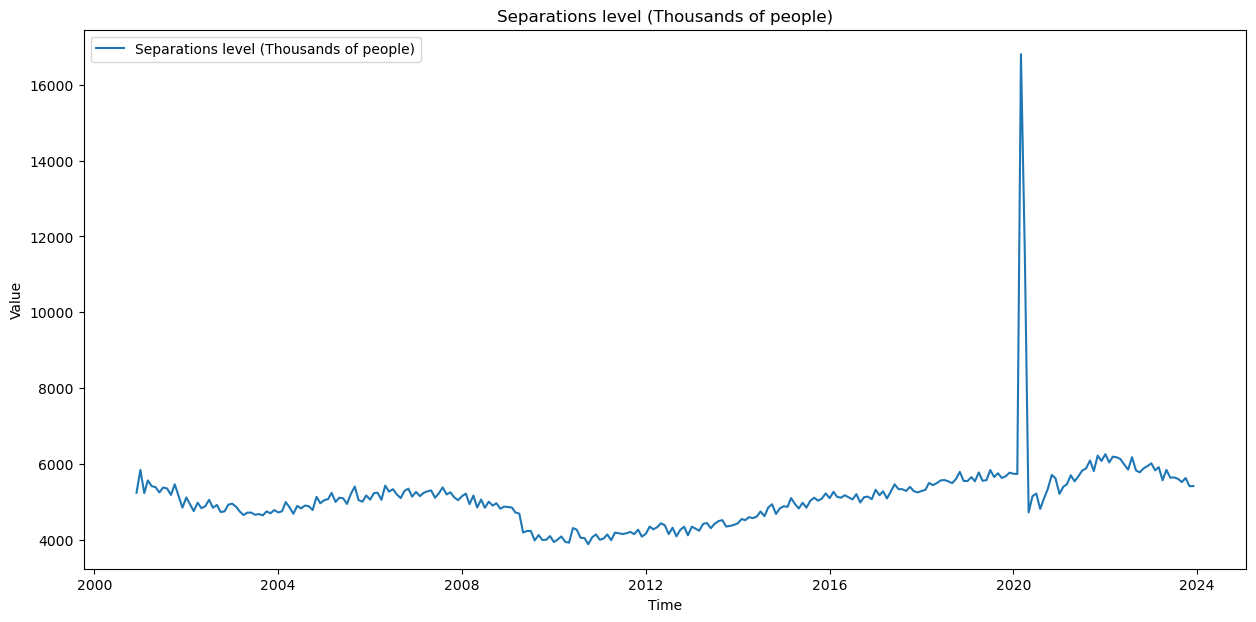

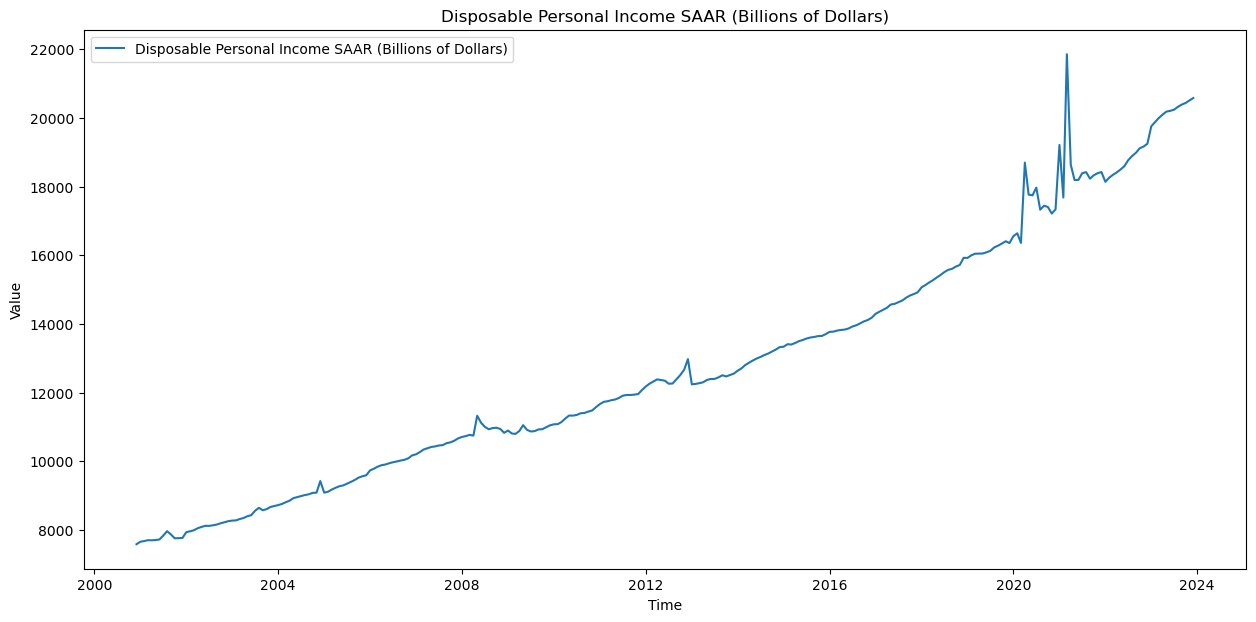

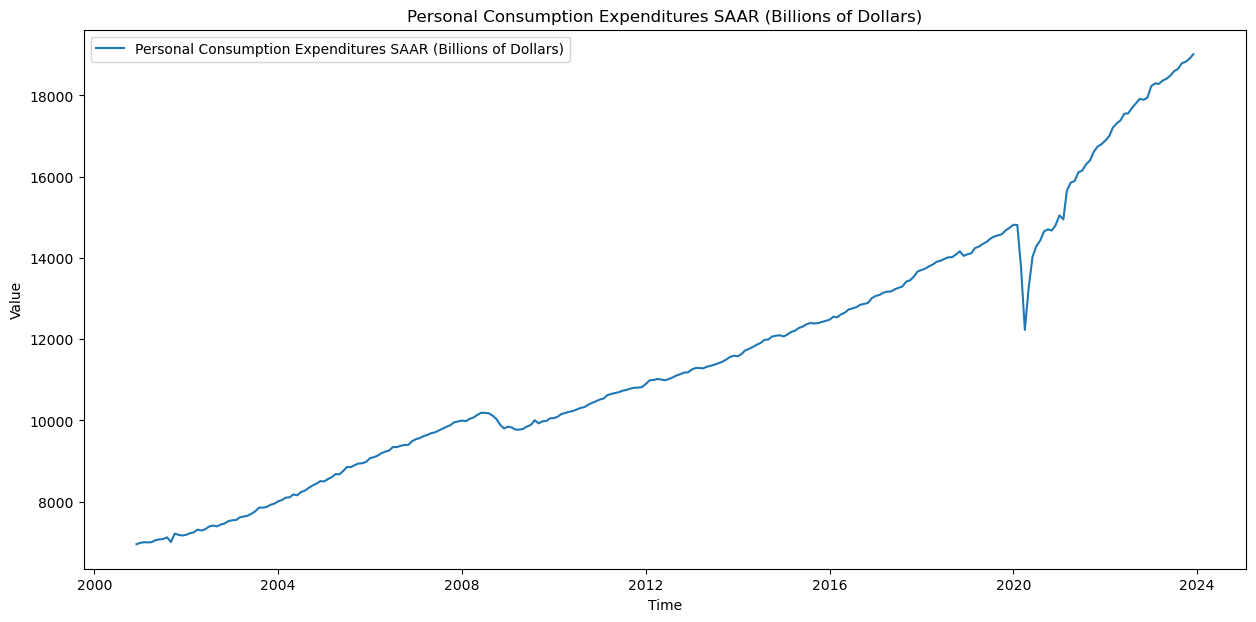

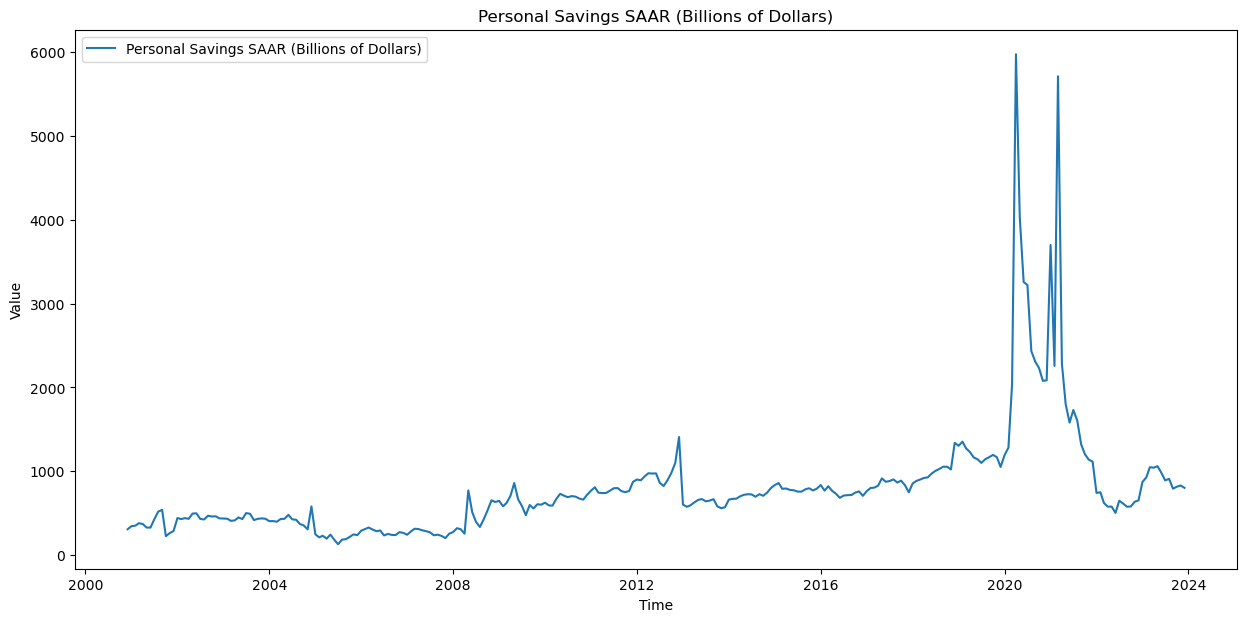

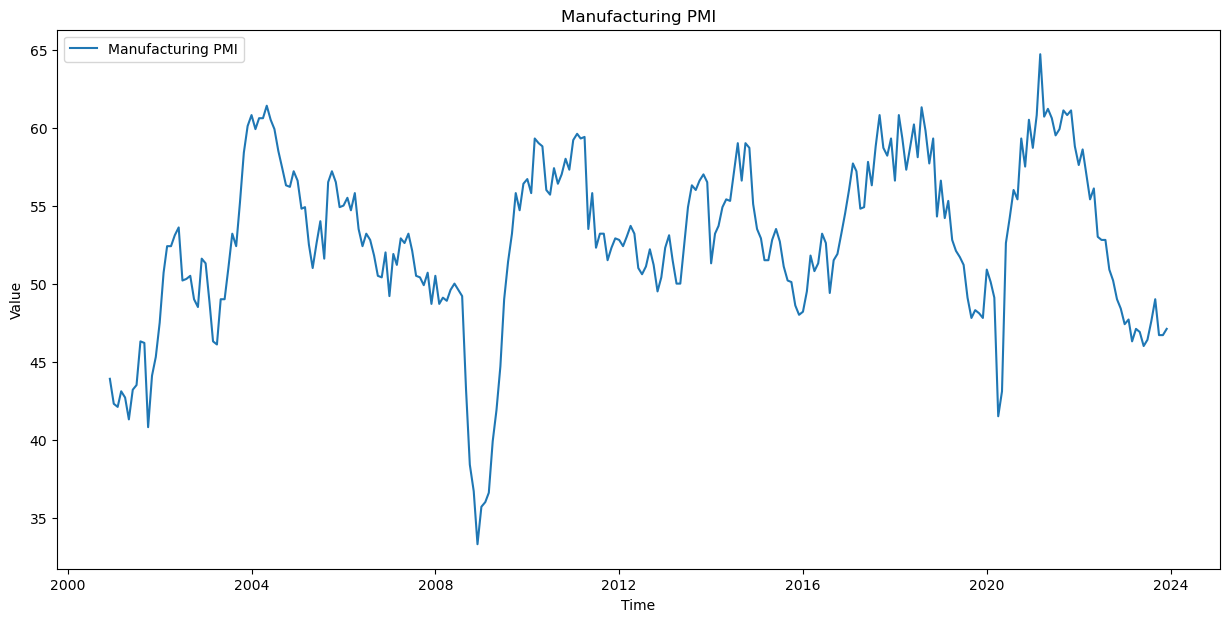

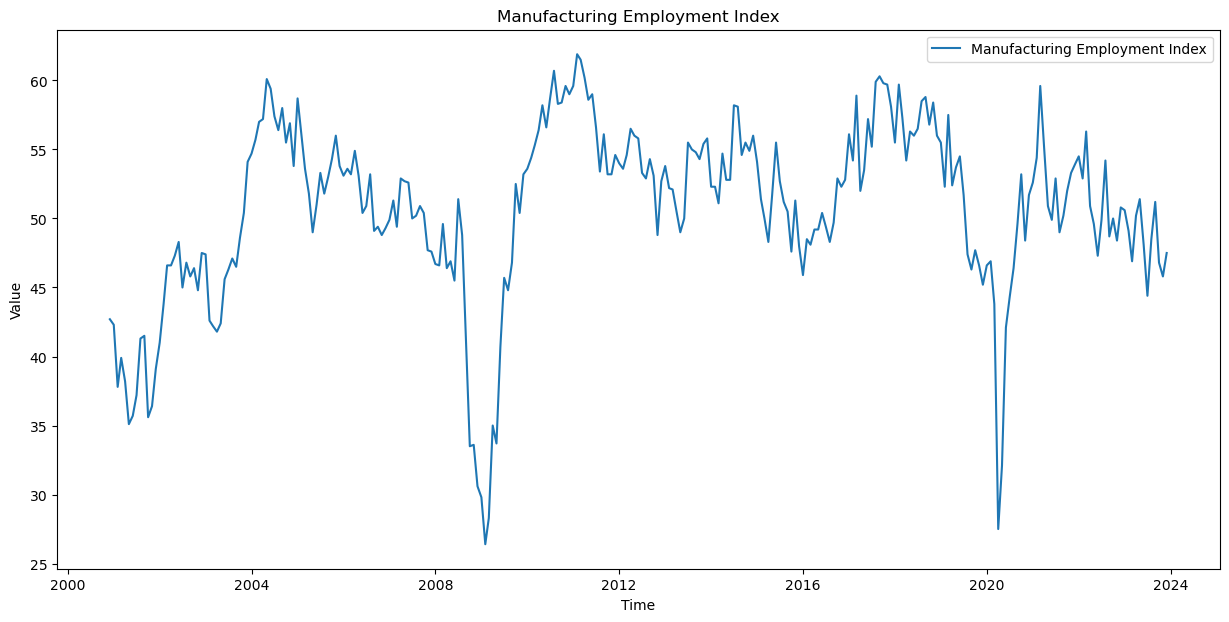

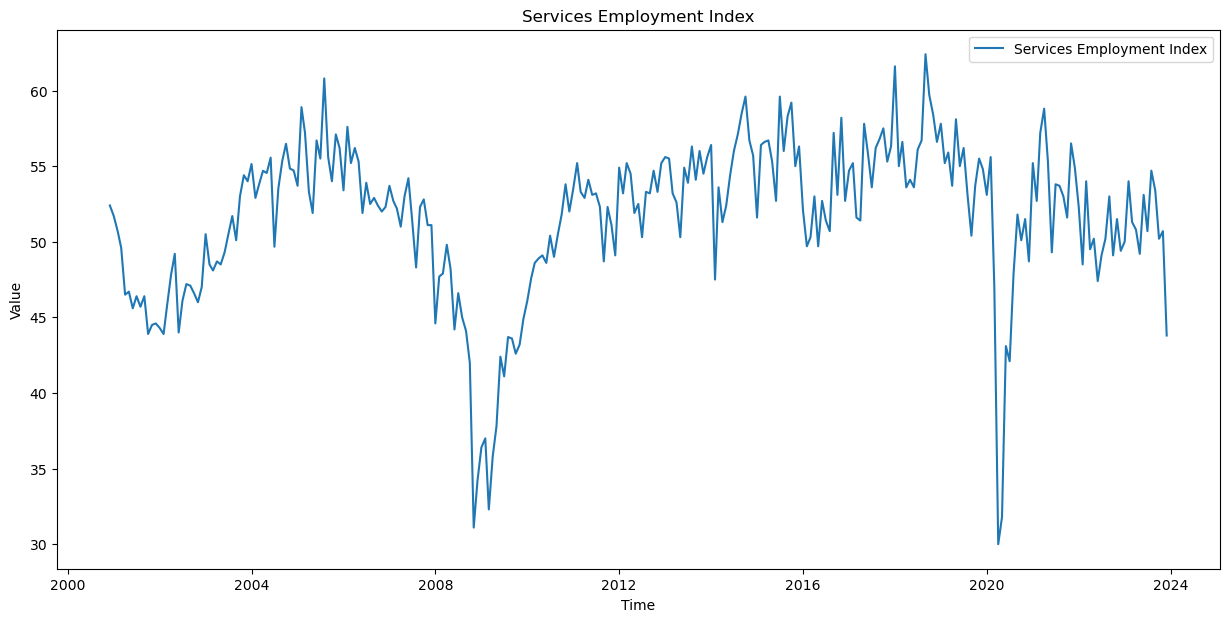

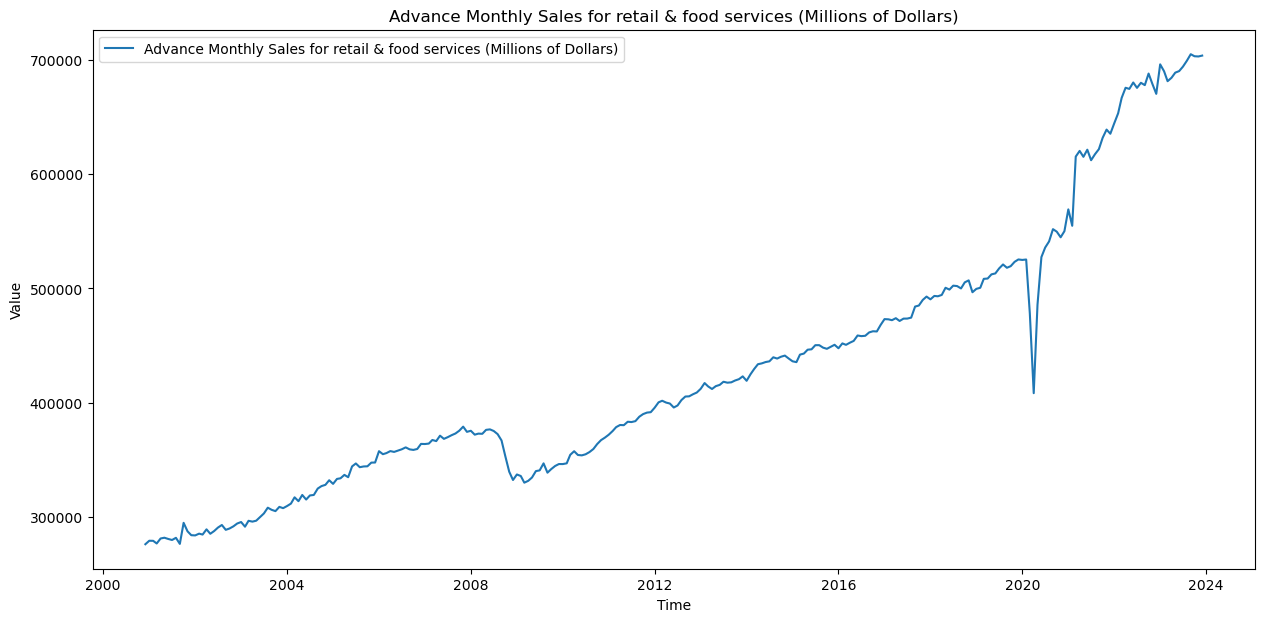

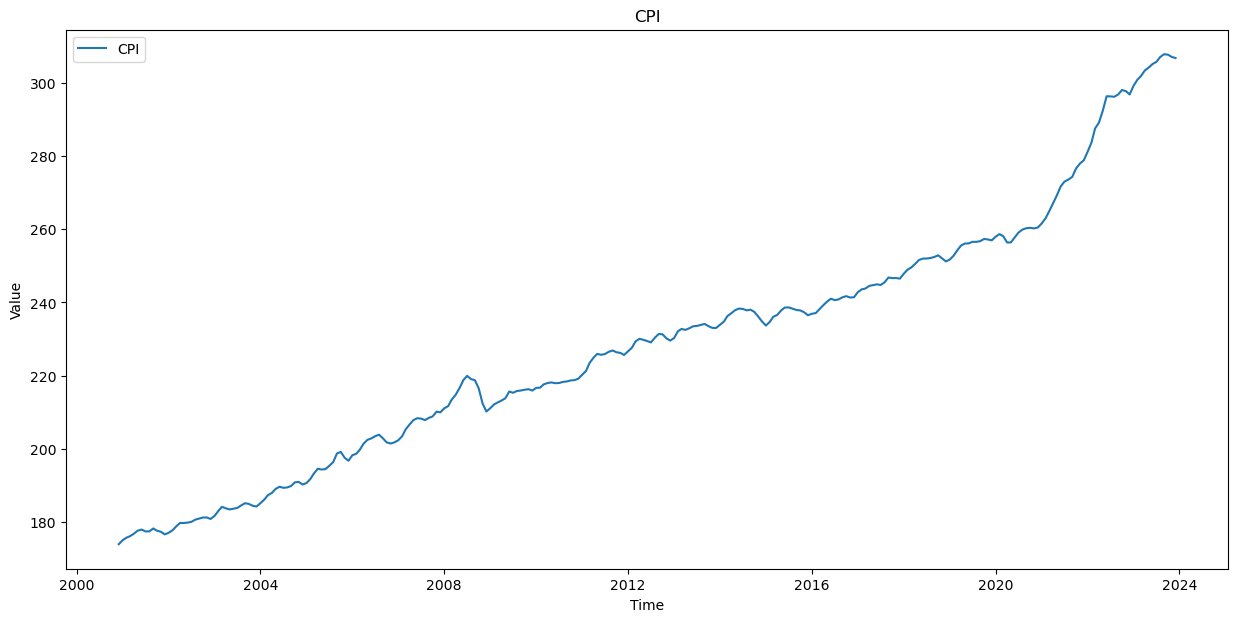

In [18]:
for variable in exogenous_variables:
    plt.figure(figsize=(15, 7))
    plt.plot(data.index, data[variable], label=variable)
    plt.title(variable)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

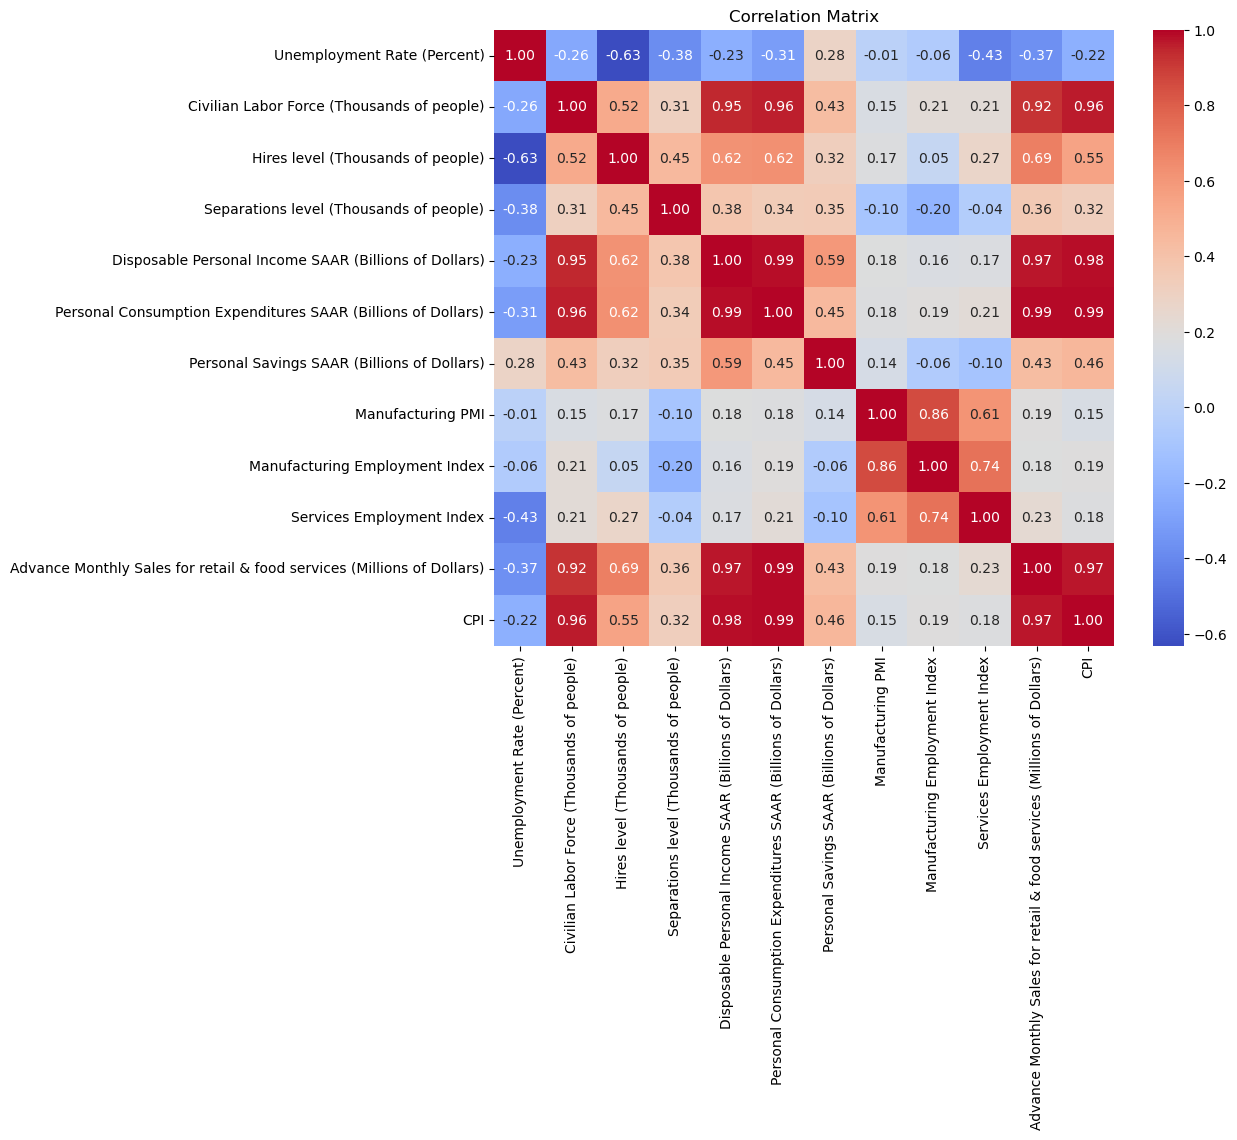

In [19]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [20]:
data_filtered=data.copy()

In [21]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 277 entries, 2000-12-01 to 2023-12-01
Data columns (total 12 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Unemployment Rate (Percent)                                             277 non-null    float64
 1   Civilian Labor Force (Thousands of people)                              277 non-null    int64  
 2   Hires level (Thousands of people)                                       277 non-null    int64  
 3   Separations level (Thousands of people)                                 277 non-null    int64  
 4   Disposable Personal Income SAAR (Billions of Dollars)                   277 non-null    float64
 5   Personal Consumption Expenditures SAAR (Billions of Dollars)            277 non-null    float64
 6   Personal Savings SAAR (Billions of Dollars)                    

# Drop the mutually correlated columns (to avoid multi collinearity) and columns with no relationship to Unemployment levels

In [22]:
# Drop the disposable income column as it is causing multicolinearity
data_filtered.drop(['Disposable Personal Income SAAR (Billions of Dollars)','Personal Consumption Expenditures SAAR (Billions of Dollars)','Manufacturing PMI','Manufacturing Employment Index','Advance Monthly Sales for retail & food services (Millions of Dollars)'], axis=1, inplace=True)

In [23]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 277 entries, 2000-12-01 to 2023-12-01
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unemployment Rate (Percent)                  277 non-null    float64
 1   Civilian Labor Force (Thousands of people)   277 non-null    int64  
 2   Hires level (Thousands of people)            277 non-null    int64  
 3   Separations level (Thousands of people)      277 non-null    int64  
 4   Personal Savings SAAR (Billions of Dollars)  277 non-null    float64
 5   Services Employment Index                    277 non-null    float64
 6   CPI                                          277 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 17.3 KB


In [24]:
# Define the target variable
target_variable = 'Unemployment Rate (Percent)'

# Get the list of all variables except the target variable
exogenous_variables = data_filtered.columns[data_filtered.columns != target_variable]

# Checking for Stationarity in the exogenous variables

In [25]:
# Function to run ADF test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')  # Drop na to avoid invalid computation
    labels = ['ADF test statistic', 'p-value', '# lags', '# observations']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'critical value ({key})'] = val
    print(out.to_string())  # .to_string() so it doesn't print in the scientific notation
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
    print("\n")

# Apply the ADF test to each of the exogenous variables
for var in exogenous_variables:
    adf_test(data_filtered[var], title=var)

Augmented Dickey-Fuller Test: Civilian Labor Force (Thousands of people)
ADF test statistic       -0.547002
p-value                   0.882514
# lags                    2.000000
# observations          274.000000
critical value (1%)      -3.454444
critical value (5%)      -2.872147
critical value (10%)     -2.572422
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Augmented Dickey-Fuller Test: Hires level (Thousands of people)
ADF test statistic       -1.155007
p-value                   0.692645
# lags                    4.000000
# observations          272.000000
critical value (1%)      -3.454622
critical value (5%)      -2.872225
critical value (10%)     -2.572464
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Augmented Dickey-Fuller Test: Separations level (Thousands of people)
ADF test statistic       -2.714582
p-value                 

# Differencing to make the exogenous variables stationary

In [26]:
# Differencing the non-stationary variables
data_diff = data_filtered.copy()
data_diff['Hires level (Thousands of people)'] = data_filtered['Hires level (Thousands of people)'].diff()
data_diff['Personal Savings SAAR (Billions of Dollars)'] = data_filtered['Personal Savings SAAR (Billions of Dollars)'].diff()
data_diff['Civilian Labor Force (Thousands of people)'] = data_filtered['Civilian Labor Force (Thousands of people)'].diff()
data_diff['CPI'] = data_filtered['CPI'].diff()
data_diff['Separations level (Thousands of people)'] = data_filtered['Separations level (Thousands of people)'].diff()
data_diff['Unemployment Rate (Percent)'] = data_filtered['Unemployment Rate (Percent)'].diff()

# Drop the first row since differencing will create NaN values
data_diff = data_diff.dropna()


In [27]:
data_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276 entries, 2001-01-01 to 2023-12-01
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unemployment Rate (Percent)                  276 non-null    float64
 1   Civilian Labor Force (Thousands of people)   276 non-null    float64
 2   Hires level (Thousands of people)            276 non-null    float64
 3   Separations level (Thousands of people)      276 non-null    float64
 4   Personal Savings SAAR (Billions of Dollars)  276 non-null    float64
 5   Services Employment Index                    276 non-null    float64
 6   CPI                                          276 non-null    float64
dtypes: float64(7)
memory usage: 17.2 KB


In [28]:
# Apply the ADF test to each of the exogenous variables
for var in exogenous_variables:
    adf_test(data_diff[var], title=var)

Augmented Dickey-Fuller Test: Civilian Labor Force (Thousands of people)
ADF test statistic     -1.355768e+01
p-value                 2.342749e-25
# lags                  1.000000e+00
# observations          2.740000e+02
critical value (1%)    -3.454444e+00
critical value (5%)    -2.872147e+00
critical value (10%)   -2.572422e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Augmented Dickey-Fuller Test: Hires level (Thousands of people)
ADF test statistic     -1.334728e+01
p-value                 5.761279e-25
# lags                  3.000000e+00
# observations          2.720000e+02
critical value (1%)    -3.454622e+00
critical value (5%)    -2.872225e+00
critical value (10%)   -2.572464e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Augmented Dickey-Fuller Test: Separations level (Thousands of people)
ADF test statistic     -1.048783e+01
p-value     

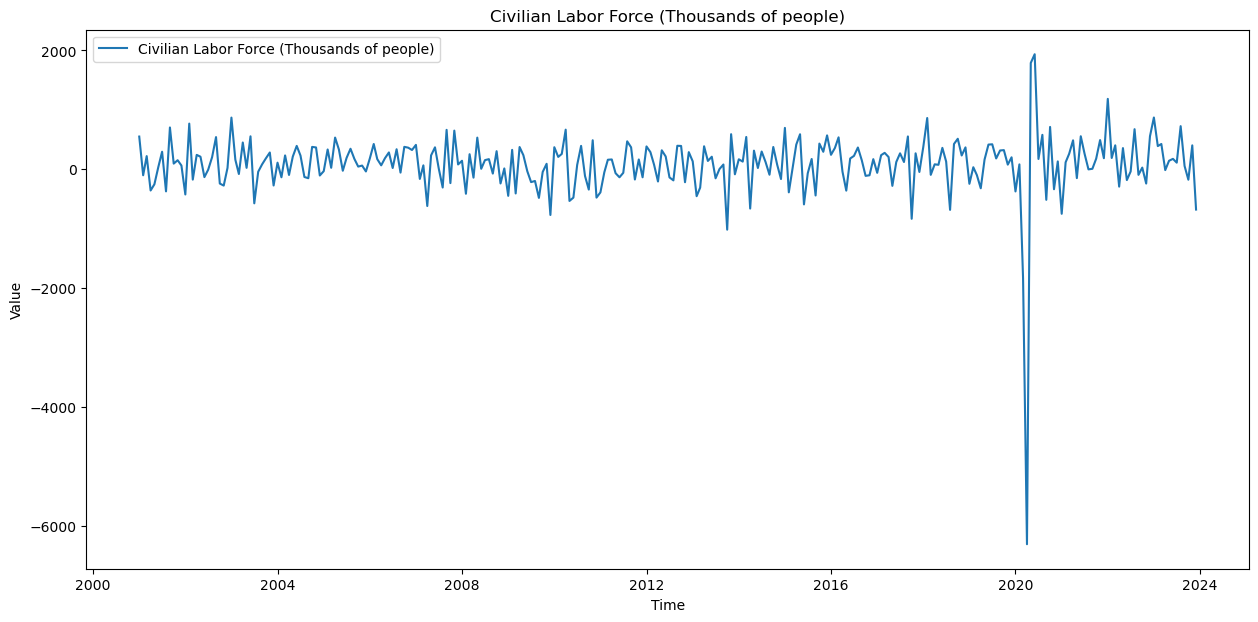

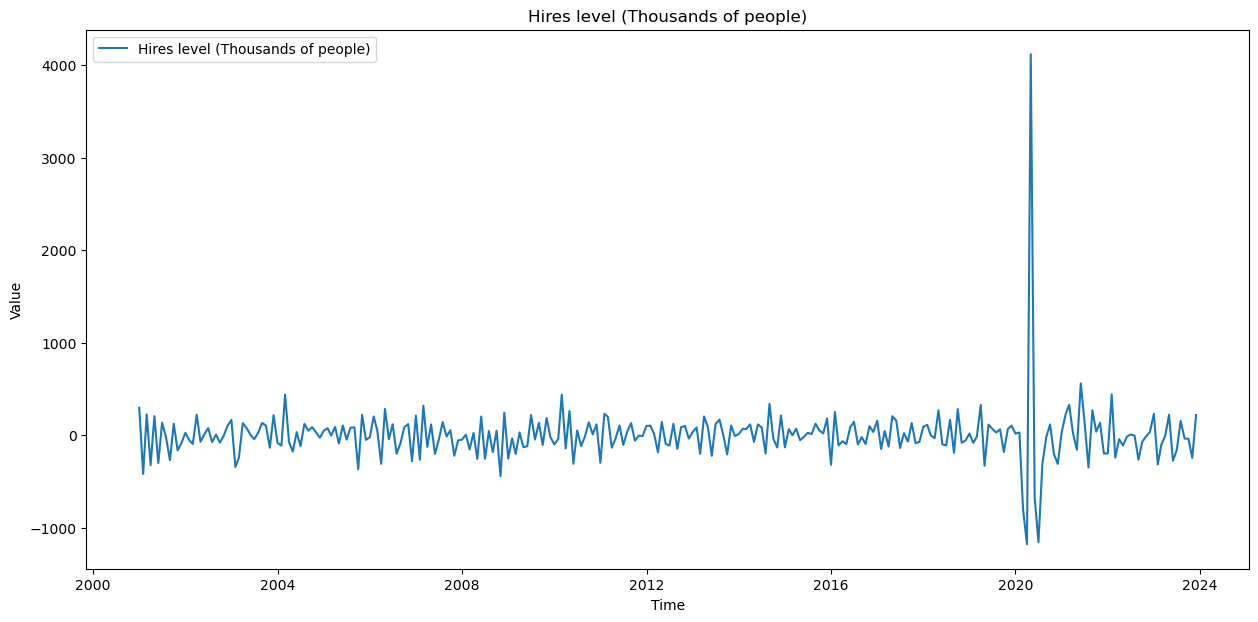

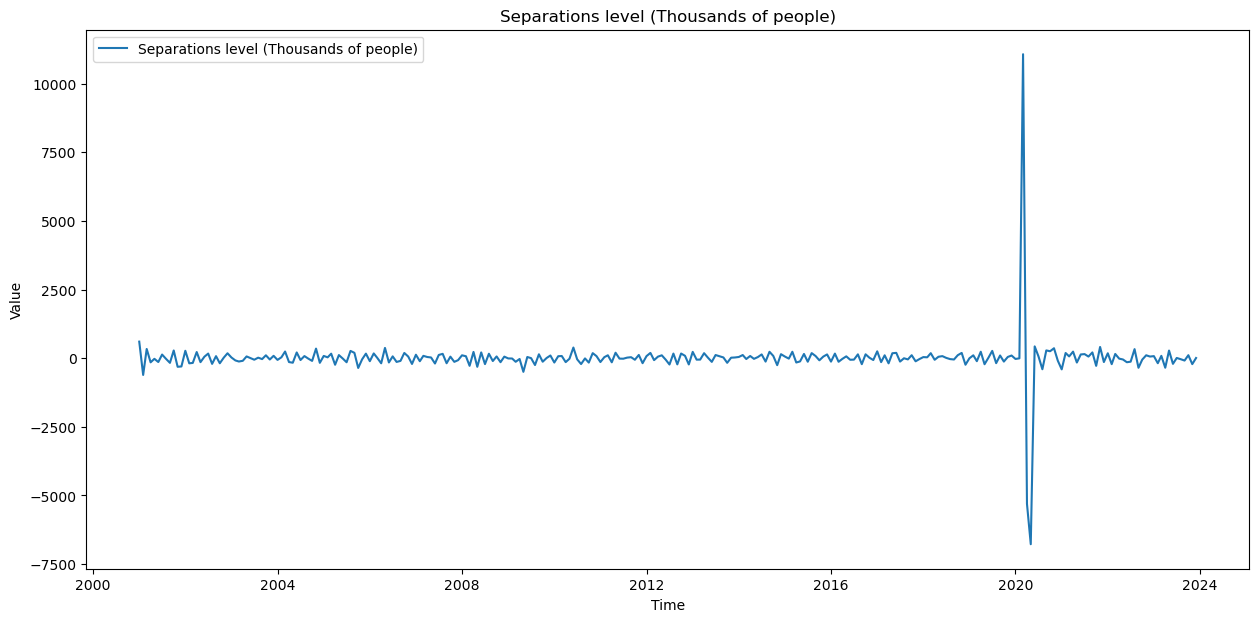

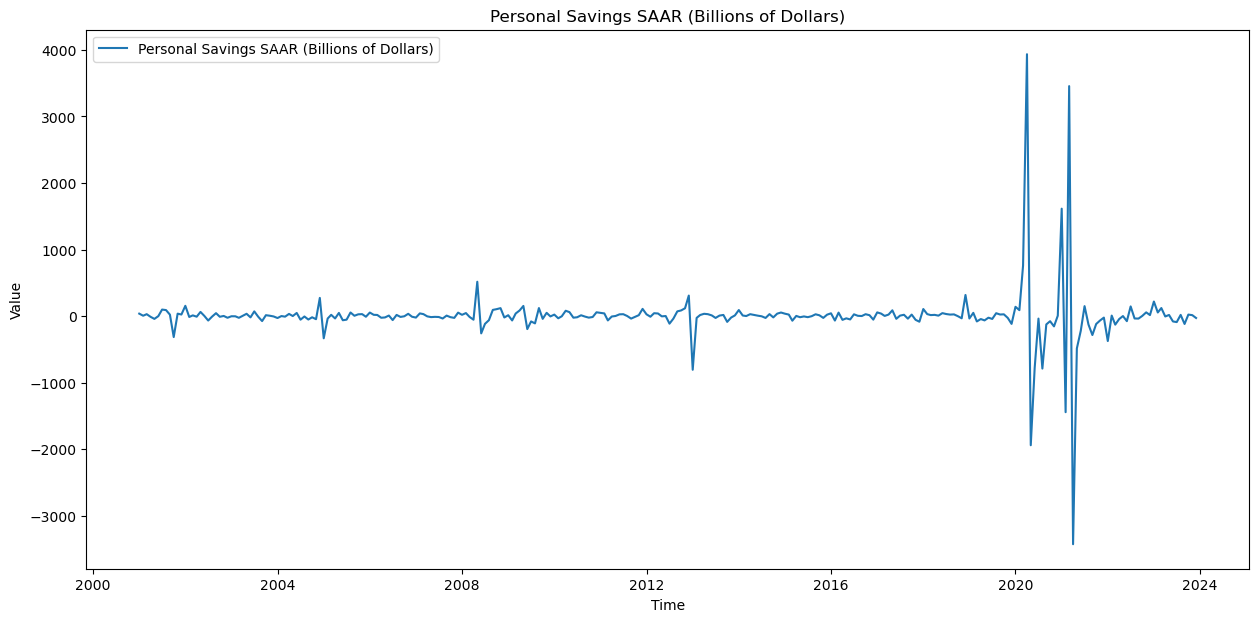

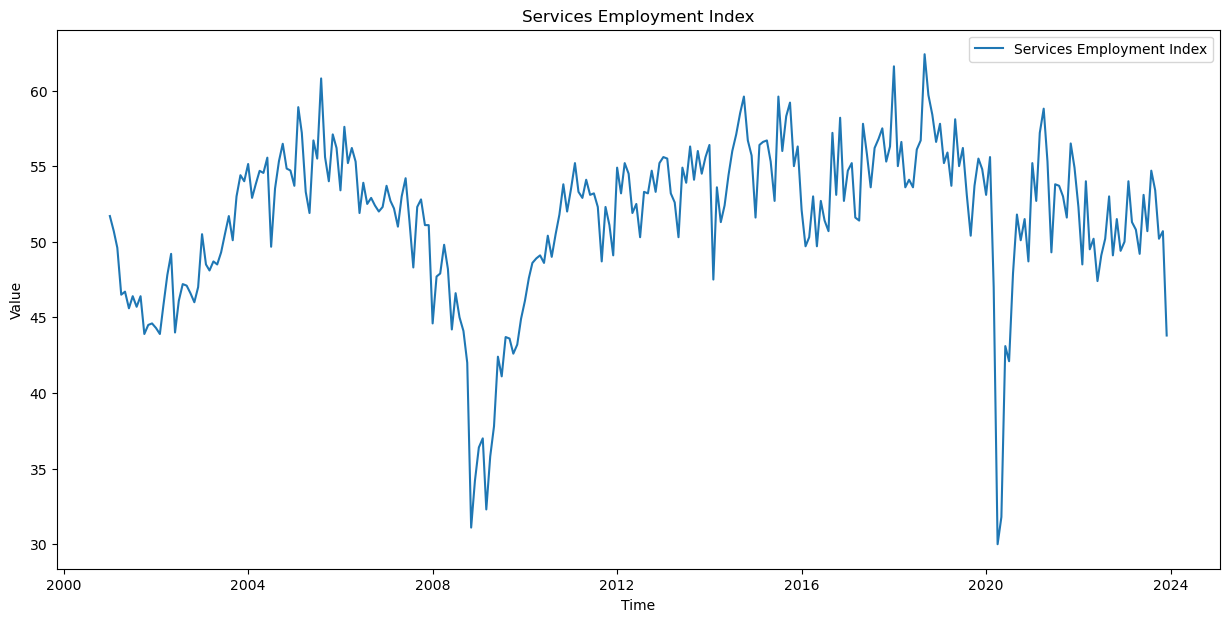

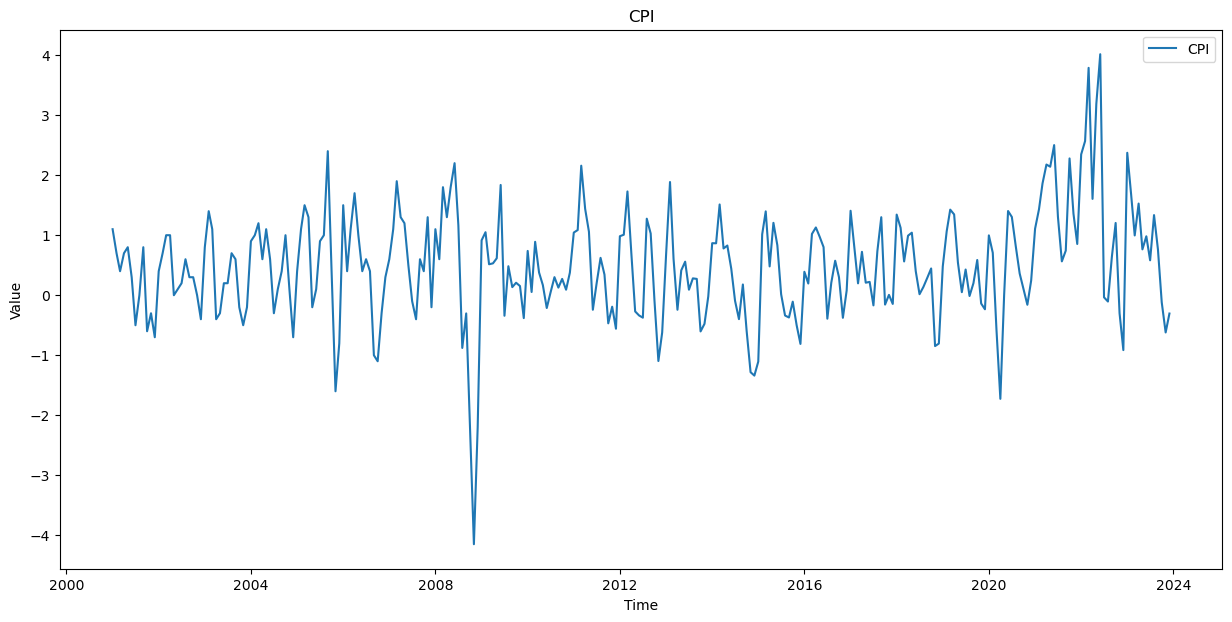

In [29]:
for variable in exogenous_variables:
    plt.figure(figsize=(15, 7))
    plt.plot(data_diff.index, data_diff[variable], label=variable)
    plt.title(variable)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Modelling with exogenous varibales

# SARIMAX(1,1,1) with 6 exogenous variables

In [30]:
# Prepare the exogenous variables (features) and the endogenous variable (target)
exog = data_diff[exogenous_variables]
endog = data_diff[target_variable]

# Split the data into train and test sets
train_size = int(len(data_diff) * 0.8)
train_endog = endog[:train_size]
train_exog = exog[:train_size]
test_endog = endog[train_size:]
test_exog = exog[train_size:]

# Fit the ARIMAX model
model = SARIMAX(train_endog, exog=train_exog, order=(1,1,1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Predictions
predictions = model_fit.get_forecast(steps=len(test_endog), exog=test_exog)
predicted_means = predictions.predicted_mean
predicted_intervals = predictions.conf_int()




# Calculate the error metrics
mae = mean_absolute_error(test_endog, predicted_means)
mse = mean_squared_error(test_endog, predicted_means)
rmse = mse**0.5

# Extract AIC and BIC values
aic = model_fit.aic
bic = model_fit.bic
print(f'AIC: {aic}')
print(f'BIC: {bic}')


# Output the error metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                    
Dep. Variable:     Unemployment Rate (Percent)   No. Observations:                  220
Model:                        SARIMAX(1, 1, 1)   Log Likelihood                 118.249
Date:                         Sat, 20 Apr 2024   AIC                           -218.497
Time:                                 00:15:17   BIC                           -187.995
Sample:                             01-01-2001   HQIC                          -206.178
                                  - 04-01-2019                                         
Covariance Type:                           opg                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Civilian Labor Force (Thousands of people)      0.0001   2.33e-05      6

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_arr

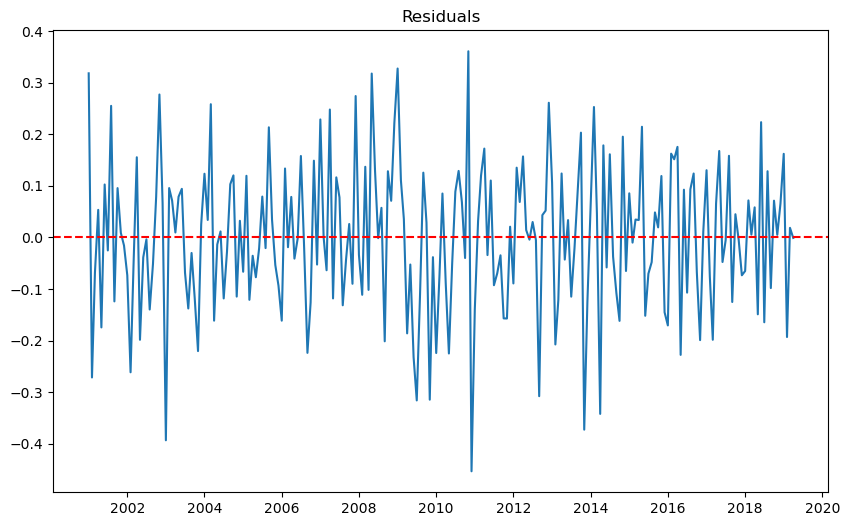

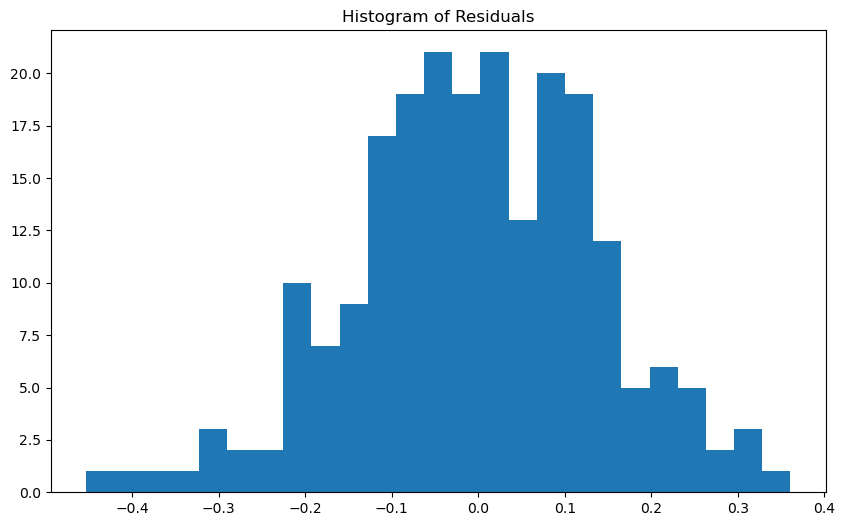

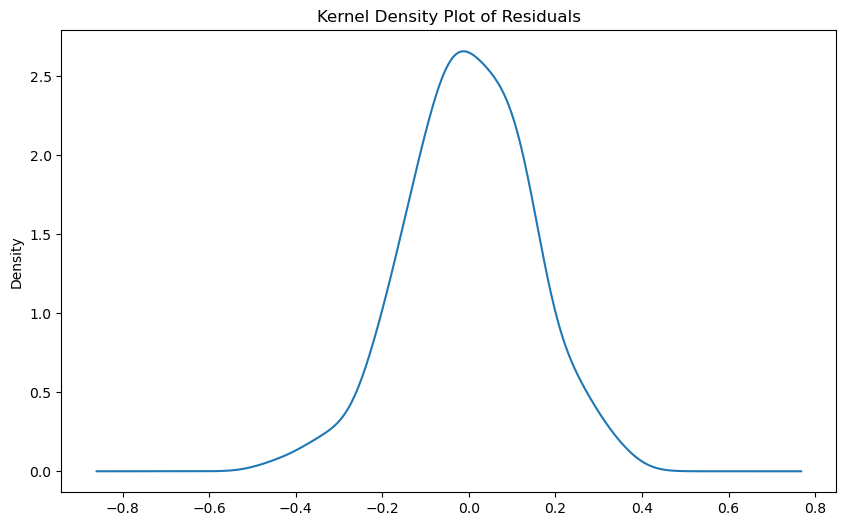

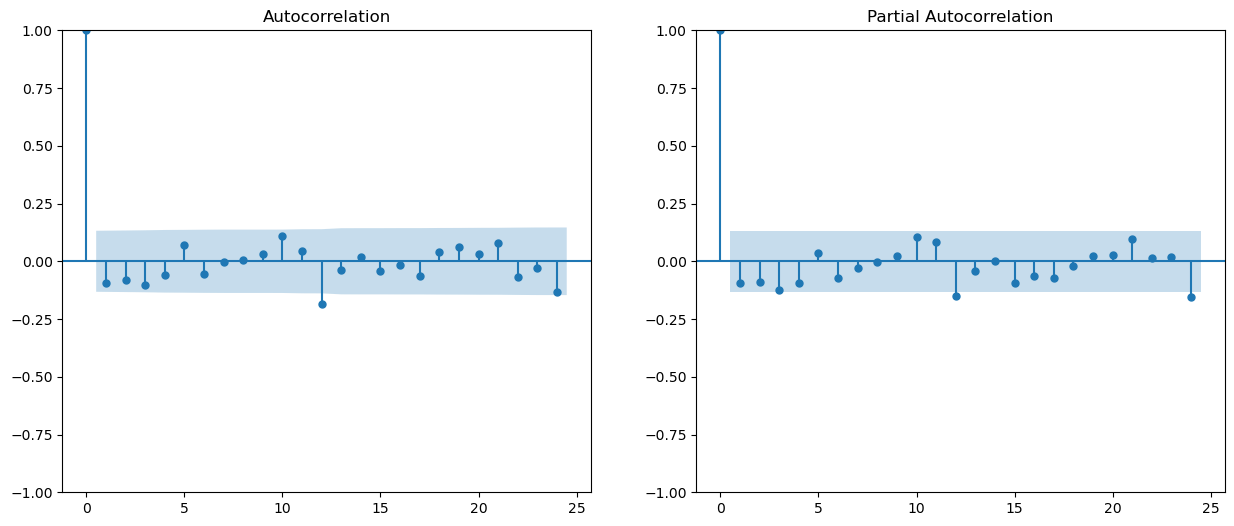

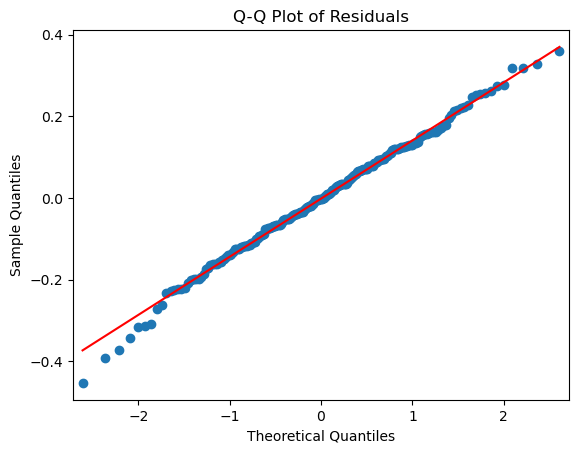

      lb_stat  lb_pvalue
10  11.526629   0.317985
Durbin-Watson statistic: 2.17


In [31]:
# Residuals
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=25)
plt.title('Histogram of Residuals')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(10, 6))
residuals.plot(kind='kde')
plt.title('Kernel Density Plot of Residuals')
plt.show()

# ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(residuals, ax=ax[0])
plot_pacf(residuals, ax=ax[1])
plt.show()

# Q-Q plot
fig = sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Ljung-Box Test
lb_test = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)

# Durbin-Watson test for autocorrelation

dw = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw:.2f}")

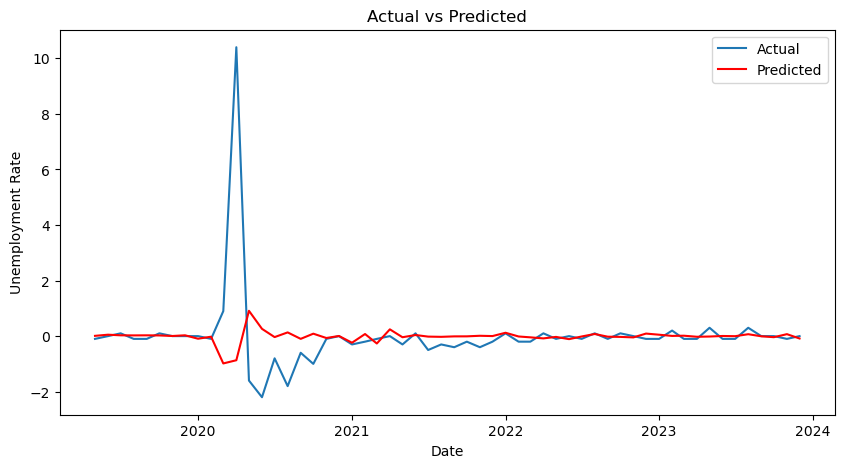

In [32]:
# Plotting the actual vs. predicted values for visual comparison
plt.figure(figsize=(10, 5))
plt.plot(test_endog.index, test_endog, label='Actual')
plt.plot(test_endog.index, predicted_means, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()

# Removing exogenous variables with less significance

In [33]:
data_diff1 = data_diff.copy()


# Drop the insignificant columns
data_diff1.drop(['Hires level (Thousands of people)','Separations level (Thousands of people)','Personal Savings SAAR (Billions of Dollars)','CPI'], axis=1, inplace=True)

In [34]:
# Define the target variable
target_variable = 'Unemployment Rate (Percent)'

# Get the list of all variables except the target variable
exogenous_variables = data_diff1.columns[data_diff1.columns != target_variable]

# SARIMAX(1,1,1) with 2 exogenous variables

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                    
Dep. Variable:     Unemployment Rate (Percent)   No. Observations:                  220
Model:                        SARIMAX(1, 1, 1)   Log Likelihood                 120.822
Date:                         Sat, 20 Apr 2024   AIC                           -231.644
Time:                                 00:15:20   BIC                           -214.699
Sample:                             01-01-2001   HQIC                          -224.800
                                  - 04-01-2019                                         
Covariance Type:                           opg                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Civilian Labor Force (Thousands of people)     0.0002   2.22e-05      6.76

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_arr

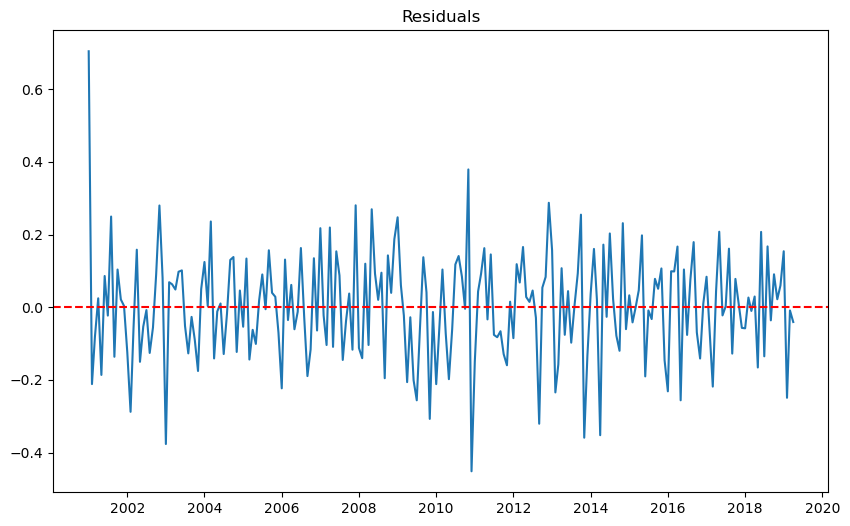

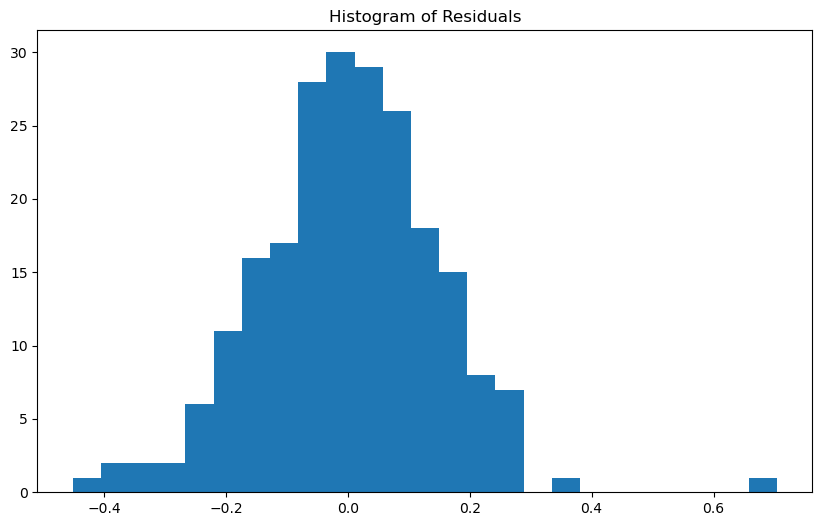

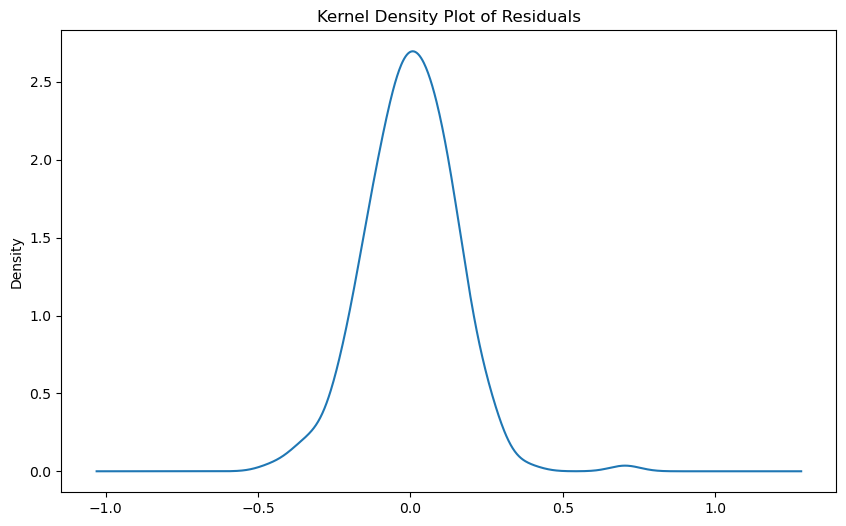

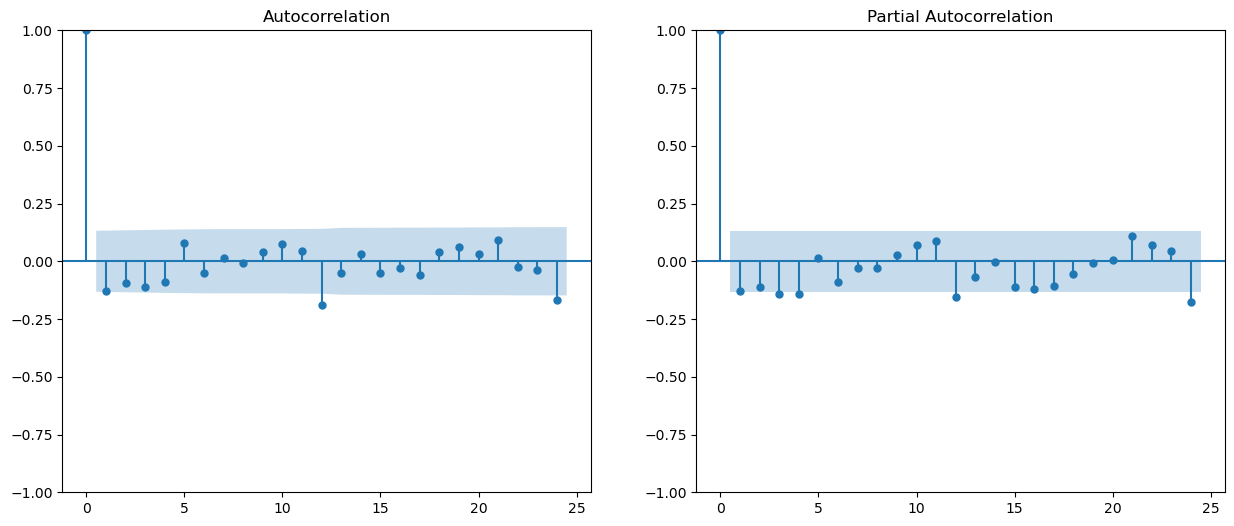

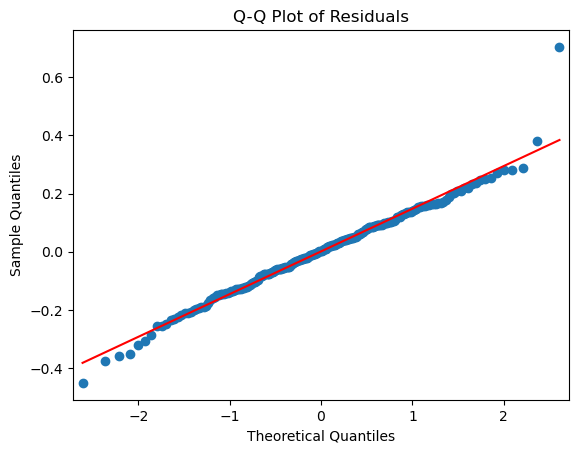

      lb_stat  lb_pvalue
10  13.838938   0.180466
Durbin-Watson statistic: 2.15


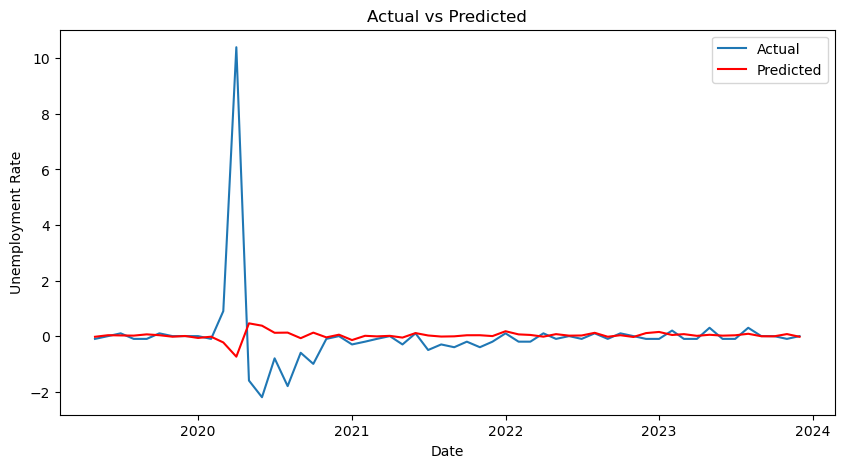

In [35]:
# Prepare the exogenous variables (features) and the endogenous variable (target)
exog = data_diff1[exogenous_variables]
endog = data_diff1[target_variable]

# Split the data into train and test sets
train_size = int(len(data_diff1) * 0.8)
train_endog = endog[:train_size]
train_exog = exog[:train_size]
test_endog = endog[train_size:]
test_exog = exog[train_size:]

# Fit the ARIMAX model
model2 = SARIMAX(train_endog, exog=train_exog, order=(1,1,1))
model_fit2 = model2.fit()

# Summary of the model
print(model_fit2.summary())

# Predictions
predictions2 = model_fit2.get_forecast(steps=len(test_endog), exog=test_exog)
predicted_means2 = predictions2.predicted_mean
predicted_intervals2 = predictions2.conf_int()

# Calculate the error metrics
mae2 = mean_absolute_error(test_endog, predicted_means2)
mse2 = mean_squared_error(test_endog, predicted_means2)
rmse2 = mse2**0.5

# Output the error metrics
print(f'Mean Absolute Error (MAE): {mae2}')
print(f'Mean Squared Error (MSE): {mse2}')
print(f'Root Mean Squared Error (RMSE): {rmse2}')

# Extract AIC and BIC values
aic = model_fit2.aic
bic = model_fit2.bic
print(f'AIC: {aic}')
print(f'BIC: {bic}')

# Residuals
residuals2 = model_fit2.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals2)
plt.title('Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals2, bins=25)
plt.title('Histogram of Residuals')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(10, 6))
residuals2.plot(kind='kde')
plt.title('Kernel Density Plot of Residuals')
plt.show()

# ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(residuals2, ax=ax[0])
plot_pacf(residuals2, ax=ax[1])
plt.show()

# Q-Q plot
fig = sm.qqplot(residuals2, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Ljung-Box Test
lb_test = sm.stats.acorr_ljungbox(residuals2, lags=[10], return_df=True)
print(lb_test)

# Durbin-Watson test for autocorrelation
dw = durbin_watson(residuals2)
print(f"Durbin-Watson statistic: {dw:.2f}")

# Plotting the actual vs. predicted values for visual comparison
plt.figure(figsize=(10, 5))
plt.plot(test_endog.index, test_endog, label='Actual')
plt.plot(test_endog.index, predicted_means2, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()

# Comparing Statistical models with Machine Learning Models

# LSTM(Vanilla)

# without exogenous variables

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

Epoch 1/100



169/169 - 7s - loss: 9.5439e-04 - val_loss: 9.2215e-05 - lr: 0.0010 - 7s/epoch - 40ms/step
Epoch 2/100
169/169 - 1s - loss: 1.7472e-04 - val_loss: 1.4203e-04 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 3/100
169/169 - 1s - loss: 1.9682e-04 - val_loss: 9.1757e-05 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 4/100
169/169 - 1s - loss: 2.1812e-04 - val_loss: 8.8147e-05 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 5/100
169/169 - 1s - loss: 1.8852e-04 - val_loss: 9.7813e-05 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 6/100
169/169 - 1s - loss: 2.1250e-04 - val_loss: 2.2313e-04 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 7/100
169/169 - 1s - loss: 1.9970e-04 - val_loss: 2.9513e-04 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 8/100
169/169 - 1s - loss: 1.8959e-04 - val_loss: 9.8327e-05 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 9/100
169/169 - 1s - loss: 1.9562e-04 - val_loss: 1.7033e-04 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 10/100
169/169 - 1s - loss: 1.7237e-04 - val_loss: 9.8393e-05 - lr: 0.0010 - 1s/epoch -

Epoch 81/100
169/169 - 1s - loss: 1.6949e-04 - val_loss: 8.7626e-05 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 82/100
169/169 - 1s - loss: 1.8326e-04 - val_loss: 2.4566e-04 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 83/100
169/169 - 1s - loss: 1.8175e-04 - val_loss: 9.5373e-05 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 84/100
169/169 - 1s - loss: 1.7155e-04 - val_loss: 1.1424e-04 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 85/100
169/169 - 1s - loss: 1.5793e-04 - val_loss: 9.3109e-05 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 86/100
169/169 - 1s - loss: 1.8166e-04 - val_loss: 8.8017e-05 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 87/100
169/169 - 1s - loss: 1.8003e-04 - val_loss: 1.2144e-04 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 88/100
169/169 - 1s - loss: 1.6575e-04 - val_loss: 8.6138e-05 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 89/100
169/169 - 1s - loss: 1.6655e-04 - val_loss: 9.8825e-05 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 90/100
169/169 - 1s - loss: 1.7002e-04 - val_loss: 2.0119e-04 - lr:

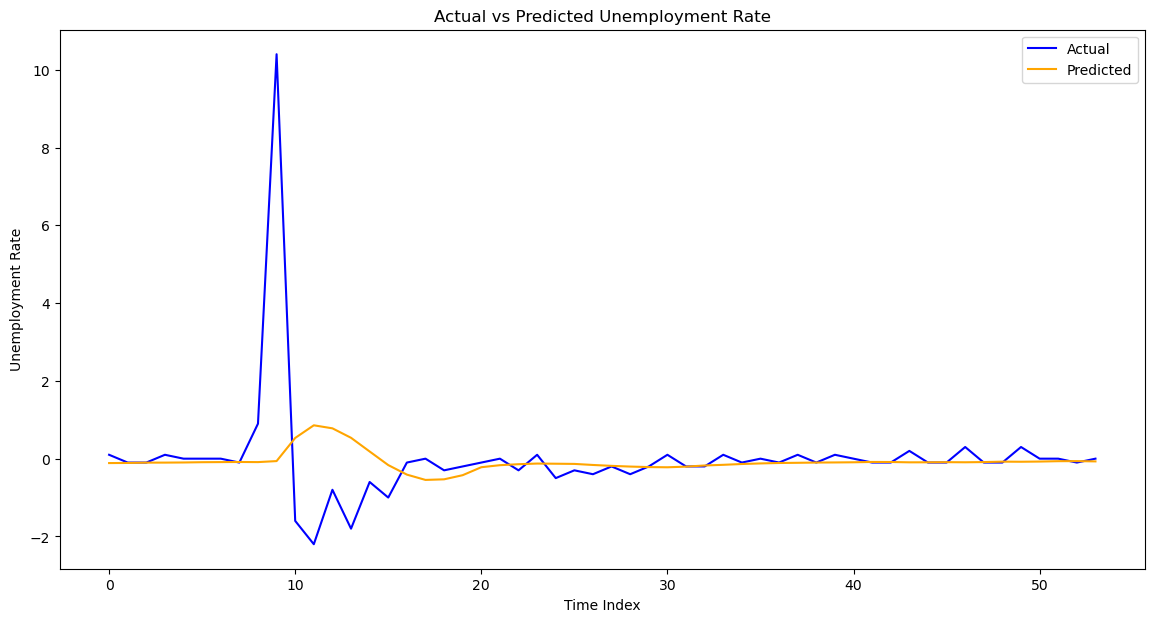

1/1 [==============================] - 0s 46ms/step
Dedifferenced forecasted values:
[3.6212469384074213, 3.5304052948951723, 3.427157384157181, 3.3162419617176058, 3.1951566457748415, 3.0661001920700075, 2.934609663486481, 2.798842024803162, 2.6599534273147585, 2.5180261850357057, 2.3748725175857546, 2.2302735567092897]


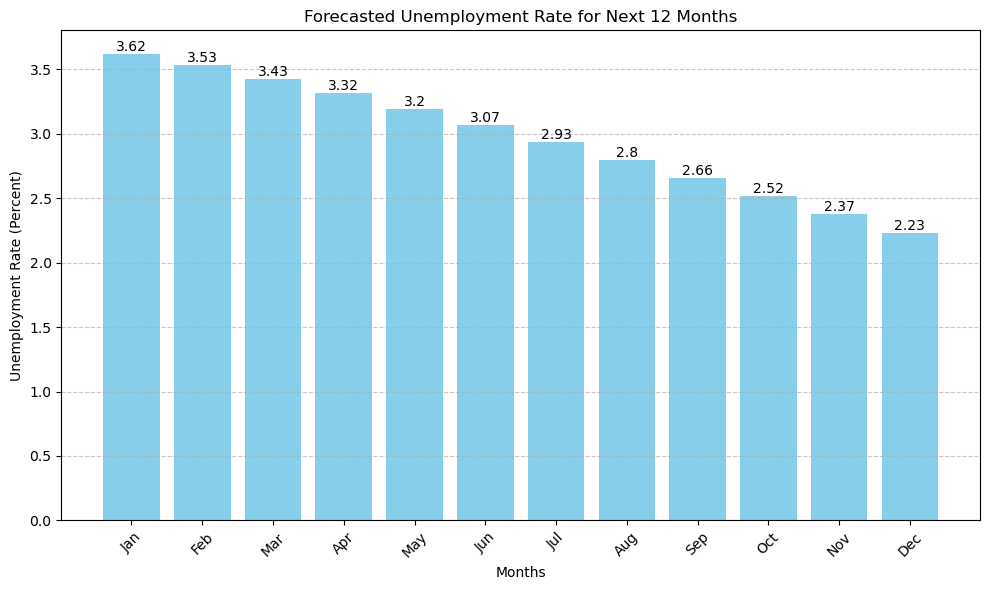

In [36]:

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_diff1[['Unemployment Rate (Percent)']])

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX).reshape(-1, look_back, 1), np.array(dataY).reshape(-1, 1)

look_back = 10
X, y = create_dataset(data_scaled, look_back)

train_size = int(len(X) * 0.8)
trainX, testX = X[:train_size], X[train_size:]
trainY, testY = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.001)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, validation_split=0.2, callbacks=[reduce_lr])


predicted = model.predict(testX)
predicted_rescaled = scaler.inverse_transform(predicted)
testY_rescaled = scaler.inverse_transform(testY)
mse = mean_squared_error(testY_rescaled, predicted_rescaled)
mae = mean_absolute_error(testY_rescaled, predicted_rescaled)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(14, 7))
plt.plot(testY_rescaled, label='Actual', color='blue')
plt.plot(predicted_rescaled, label='Predicted', color='orange')
plt.title('Actual vs Predicted Unemployment Rate')
plt.xlabel('Time Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()


# Assuming last_sequence is the last part of data_scaled used for forecasting
last_sequence = data_scaled[-look_back:]
current_input = last_sequence.reshape(1, look_back, 1)

predicted_changes = []
for _ in range(12):
    next_difference = model.predict(current_input)
    predicted_changes.append(next_difference.flatten()[0])
    next_difference_reshaped = next_difference.reshape(1, 1, 1)
    current_input = np.append(current_input[:, 1:, :], next_difference_reshaped, axis=1)

predicted_changes_array = np.array(predicted_changes).reshape(-1, 1)
predicted_changes_rescaled = scaler.inverse_transform(predicted_changes_array).flatten()

# Dedifference the predictions
last_actual_value = data['Unemployment Rate (Percent)'].iloc[-1]
dedifferenced_predictions = [last_actual_value + np.sum(predicted_changes_rescaled[:i+1]) for i in range(12)]


print("Dedifferenced forecasted values:")
print(dedifferenced_predictions)

# Months (you can replace these with actual month labels)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the bar chart with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(months, dedifferenced_predictions, color='skyblue')
plt.title('Forecasted Unemployment Rate for Next 12 Months')
plt.xlabel('Months')
plt.ylabel('Unemployment Rate (Percent)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations on top of each bar
for bar, value in zip(bars, dedifferenced_predictions):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             round(value, 2), 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()


# with exogenous variables

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

Epoch 1/100
212/212 - 5s - loss: 6.3254e-04 - 5s/epoch - 23ms/step
Epoch 2/100
212/212 - 1s - loss: 2.5799e-04 - 1s/epoch - 6ms/step
Epoch 3/100
212/212 - 1s - loss: 1.9083e-04 - 1s/epoch - 6ms/step
Epoch 4/100
212/212 - 1s - loss: 2.2391e-04 - 1s/epoch - 6ms/step
Epoch 5/100
212/212 - 1s - loss: 1.8615e-04 - 1s/epoch - 6ms/step
Epoch 6/100
212/212 - 1s - loss: 1.9487e-04 - 1s/epoch - 6ms/step
Epoch 7/100
212/212 - 1s - loss: 1.7883e-04 - 1s/epoch - 6ms/step
Epoch 8/100
212/212 - 1s - loss: 1.8817e-04 - 1s/epoch - 6ms/step
Epoch 9/100
212/212 - 1s - loss: 2.0123e-04 - 1s/epoch - 6ms/step
Epoch 10/100
212/212 - 1s - loss: 1.5887e-04 - 1s/epoch - 6ms/step
Epoch 11/100
212/212 - 1s - loss: 2.0189e-04 - 1s/epoch - 6ms/step
Epoch 12/100
212/212 - 1s - loss: 1.8709e-04 - 1s/epoch - 7ms/step
Epoch 13/100
212/212 - 1s - loss: 1.5454e-04 - 1s/epoch - 6ms/step
Epoch 14/100
212/212 - 1s - loss: 1.8903e-04 - 1s/epoch - 6ms/step
Epoch 15/100
212/212 - 1s - loss: 1.7979e-04 - 1s/epoch - 6ms/step
Epo

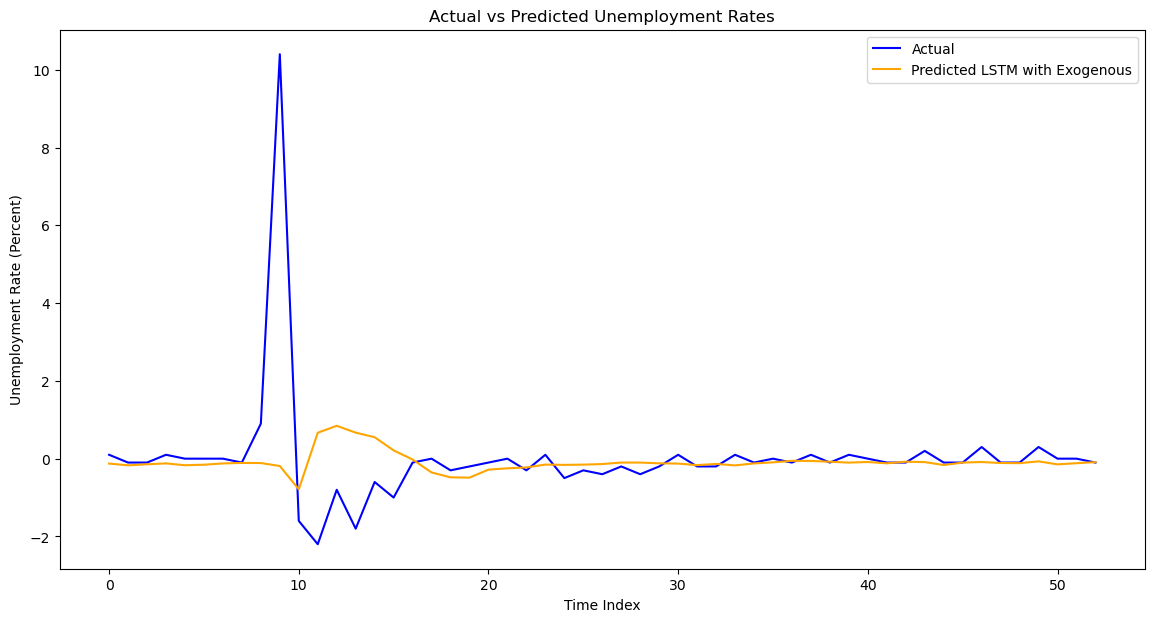

In [37]:
# Data Preparation
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_diff1[['Unemployment Rate (Percent)', 'Civilian Labor Force (Thousands of people)', 'Services Employment Index']])

# Create dataset for LSTM considering all features
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY).reshape(-1, 1)

look_back = 10
X, y = create_dataset(data_scaled, look_back)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
trainX, testX = X[:train_size], X[train_size:]
trainY, testY = y[:train_size], y[train_size:]

# LSTM Model with multiple features
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 3)))  # 3 features
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.001)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Making predictions
predicted_values = model.predict(testX)

# Revert scaling
testY_rescaled = scaler.inverse_transform(np.hstack([testY, np.zeros((len(testY), 2))]))[:, 0]  # Only reverse scale target
predicted_values_rescaled = scaler.inverse_transform(np.hstack([predicted_values, np.zeros((len(predicted_values), 2))]))[:, 0]

# Calculate error metrics
mse = mean_squared_error(testY_rescaled, predicted_values_rescaled)
mae = mean_absolute_error(testY_rescaled, predicted_values_rescaled)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(testY_rescaled, label='Actual', color='blue')
plt.plot(predicted_values_rescaled, label='Predicted LSTM with Exogenous', color='orange')
plt.title('Actual vs Predicted Unemployment Rates')
plt.xlabel('Time Index')
plt.ylabel('Unemployment Rate (Percent)')
plt.legend()
plt.show()


# Bi-LSTM

# Without exogenous variables

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

Epoch 1/100
169/169 - 11s - loss: 7.0971e-04 - val_loss: 1.2667e-04 - lr: 0.0010 - 11s/epoch - 65ms/step
Epoch 2/100
169/169 - 1s - loss: 1.8599e-04 - val_loss: 8.5625e-05 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 3/100
169/169 - 1s - loss: 2.3558e-04 - val_loss: 2.6876e-04 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 4/100
169/169 - 1s - loss: 2.2237e-04 - val_loss: 8.8263e-05 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 5/100
169/169 - 1s - loss: 1.8694e-04 - val_loss: 9.4076e-05 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 6/100
169/169 - 1s - loss: 2.0415e-04 - val_loss: 9.5829e-05 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 7/100
169/169 - 1s - loss: 1.8839e-04 - val_loss: 1.2945e-04 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 8/100
169/169 - 1s - loss: 1.7509e-04 - val_loss: 9.5862e-05 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 9/100
169/169 - 1s - loss: 1.9495e-04 - val_loss: 1.4619e-04 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 10/100
169/169 - 1s - loss: 2.1343e-04 - val_loss: 1.7055e-04 - lr: 0.001

Epoch 81/100
169/169 - 1s - loss: 1.9006e-04 - val_loss: 9.3854e-05 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 82/100
169/169 - 1s - loss: 1.5521e-04 - val_loss: 1.0681e-04 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 83/100
169/169 - 1s - loss: 1.7390e-04 - val_loss: 1.1196e-04 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 84/100
169/169 - 1s - loss: 1.5972e-04 - val_loss: 8.6696e-05 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 85/100
169/169 - 1s - loss: 1.8495e-04 - val_loss: 8.8949e-05 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 86/100
169/169 - 1s - loss: 1.6095e-04 - val_loss: 1.1823e-04 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 87/100
169/169 - 1s - loss: 1.7859e-04 - val_loss: 1.1831e-04 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 88/100
169/169 - 1s - loss: 1.8832e-04 - val_loss: 8.4317e-05 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 89/100
169/169 - 1s - loss: 1.7062e-04 - val_loss: 1.7577e-04 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 90/100
169/169 - 1s - loss: 1.8054e-04 - val_loss: 1.1523e-04 - lr:

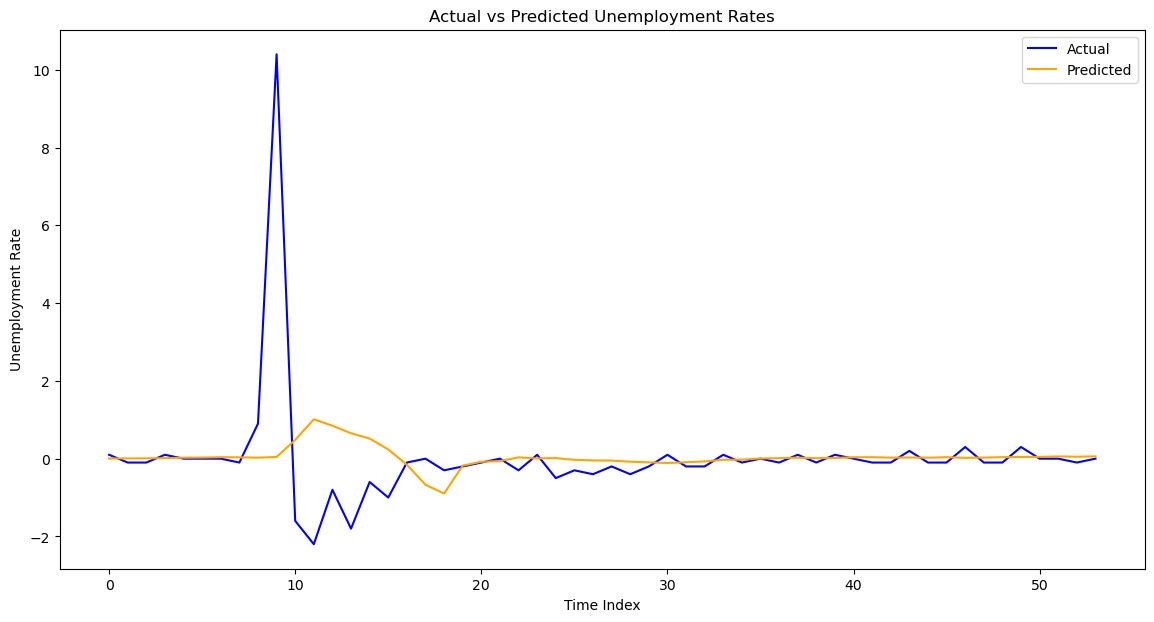

1/1 [==============================] - 0s 51ms/step
Dedifferenced forecasted values:
[3.7386014692485334, 3.7646460950374605, 3.8118696331977846, 3.8445498764514925, 3.8641385555267336, 3.9067437022924425, 3.9547268867492678, 4.008972835540772, 4.05842576622963, 4.107996416091919, 4.159141582250595, 4.210947108268738]


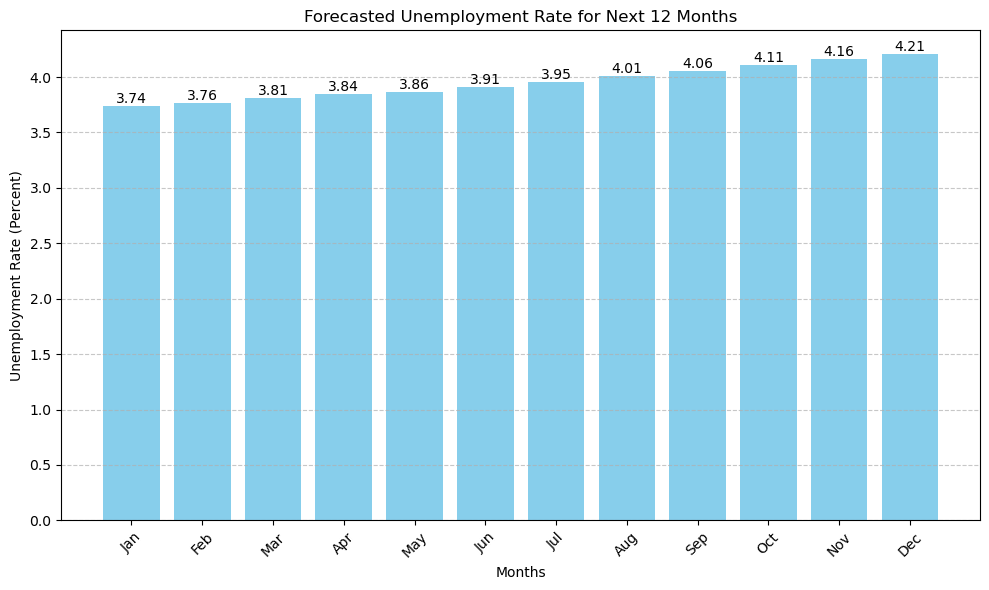

In [38]:

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_diff1[['Unemployment Rate (Percent)']])

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX).reshape(-1, look_back, 1), np.array(dataY).reshape(-1, 1)

look_back = 10
X, y = create_dataset(data_scaled, look_back)

train_size = int(len(X) * 0.8)
trainX, testX = X[:train_size], X[train_size:]
trainY, testY = y[:train_size], y[train_size:]

model = Sequential()
model.add(Bidirectional(LSTM(50, input_shape=(look_back, 1))))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.001)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, validation_split=0.2, callbacks=[reduce_lr])


predicted = model.predict(testX)
predicted_rescaled = scaler.inverse_transform(predicted)
testY_rescaled = scaler.inverse_transform(testY)
mse = mean_squared_error(testY_rescaled, predicted_rescaled)
mae = mean_absolute_error(testY_rescaled, predicted_rescaled)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(14, 7))
plt.plot(testY_rescaled, label='Actual', color='blue')
plt.plot(predicted_rescaled, label='Predicted', color='orange')
plt.title('Actual vs Predicted Unemployment Rates')
plt.xlabel('Time Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()


# Assuming last_sequence is the last part of data_scaled used for forecasting
last_sequence = data_scaled[-look_back:]
current_input = last_sequence.reshape(1, look_back, 1)

predicted_changes = []
for _ in range(12):
    next_difference = model.predict(current_input)
    predicted_changes.append(next_difference.flatten()[0])
    next_difference_reshaped = next_difference.reshape(1, 1, 1)
    current_input = np.append(current_input[:, 1:, :], next_difference_reshaped, axis=1)

predicted_changes_array = np.array(predicted_changes).reshape(-1, 1)
predicted_changes_rescaled = scaler.inverse_transform(predicted_changes_array).flatten()

# Dedifference the predictions
last_actual_value = data['Unemployment Rate (Percent)'].iloc[-1]
dedifferenced_predictions = [last_actual_value + np.sum(predicted_changes_rescaled[:i+1]) for i in range(12)]


print("Dedifferenced forecasted values:")
print(dedifferenced_predictions)

# Months (you can replace these with actual month labels)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the bar chart with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(months, dedifferenced_predictions, color='skyblue')
plt.title('Forecasted Unemployment Rate for Next 12 Months')
plt.xlabel('Months')
plt.ylabel('Unemployment Rate (Percent)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations on top of each bar
for bar, value in zip(bars, dedifferenced_predictions):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             round(value, 2), 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()


# With exogenous variables

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

Epoch 1/100
212/212 - 9s - loss: 0.0017 - 9s/epoch - 42ms/step
Epoch 2/100
212/212 - 1s - loss: 2.1126e-04 - 1s/epoch - 7ms/step
Epoch 3/100
212/212 - 1s - loss: 2.8194e-04 - 1s/epoch - 7ms/step
Epoch 4/100
212/212 - 1s - loss: 2.6371e-04 - 1s/epoch - 7ms/step
Epoch 5/100
212/212 - 1s - loss: 3.5427e-04 - 1s/epoch - 7ms/step
Epoch 6/100
212/212 - 1s - loss: 2.4217e-04 - 1s/epoch - 7ms/step
Epoch 7/100
212/212 - 1s - loss: 3.3153e-04 - 1s/epoch - 7ms/step
Epoch 8/100
212/212 - 1s - loss: 1.8565e-04 - 1s/epoch - 7ms/step
Epoch 9/100
212/212 - 1s - loss: 1.9900e-04 - 1s/epoch - 7ms/step
Epoch 10/100
212/212 - 1s - loss: 2.0258e-04 - 1s/epoch - 7ms/step
Epoch 11/100
212/212 - 1s - loss: 2.0393e-04 - 1s/epoch - 7ms/step
Epoch 12/100
212/212 - 1s - loss: 1.9830e-04 - 1s/epoch - 7ms/step
Epoch 13/100
212/212 - 1s - loss: 1.8796e-04 - 1s/epoch - 7ms/step
Epoch 14/100
212/212 - 1s - loss: 1.8274e-04 - 1s/epoch - 7ms/step
Epoch 15/100
212/212 - 1s - loss: 2.0111e-04 - 1s/epoch - 7ms/step
Epoch 1

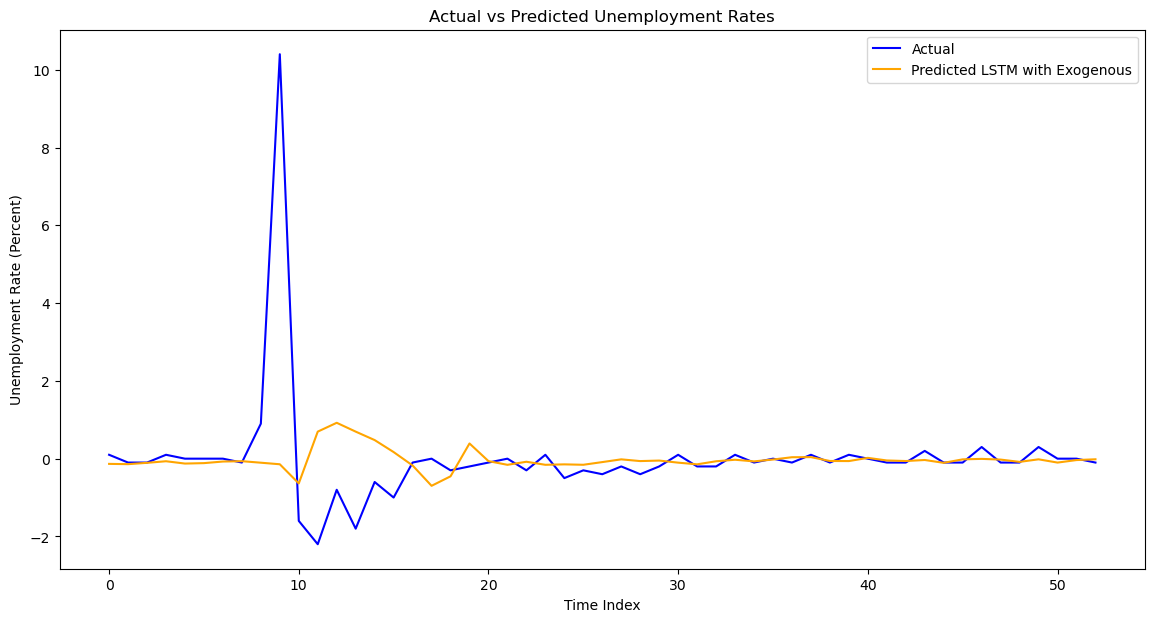

In [39]:
# Data Preparation
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_diff1[['Unemployment Rate (Percent)', 'Civilian Labor Force (Thousands of people)', 'Services Employment Index']])

# Create dataset for Bi-LSTM considering all features
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY).reshape(-1, 1)

look_back = 10
X, y = create_dataset(data_scaled, look_back)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
trainX, testX = X[:train_size], X[train_size:]
trainY, testY = y[:train_size], y[train_size:]

# Bi-LSTM Model with multiple features
model = Sequential()
model.add(Bidirectional(LSTM(50, input_shape=(look_back, 3))))  # 3 features
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.001)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Making predictions
predicted_values = model.predict(testX)

# Revert scaling
testY_rescaled = scaler.inverse_transform(np.hstack([testY, np.zeros((len(testY), 2))]))[:, 0]  # Only reverse scale target
predicted_values_rescaled = scaler.inverse_transform(np.hstack([predicted_values, np.zeros((len(predicted_values), 2))]))[:, 0]

# Calculate error metrics
mse = mean_squared_error(testY_rescaled, predicted_values_rescaled)
mae = mean_absolute_error(testY_rescaled, predicted_values_rescaled)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(testY_rescaled, label='Actual', color='blue')
plt.plot(predicted_values_rescaled, label='Predicted LSTM with Exogenous', color='orange')
plt.title('Actual vs Predicted Unemployment Rates')
plt.xlabel('Time Index')
plt.ylabel('Unemployment Rate (Percent)')
plt.legend()
plt.show()

In [40]:
#!pip uninstall tensorflow
#!pip install tensorflow

# Part -  2

# Granger Causality Test

In [41]:
# Load data (replace 'Data.xlsx' with your data file)
df_data = pd.read_excel('Data.xlsx')

# Define lag order
lag_order = 3

# Exclude the first column from the list of columns
columns_to_test = df_data.columns[2:]

# Generate combinations of column pairs excluding the first column
column_combinations = combinations(columns_to_test, 2)

# Perform Granger causality tests for each column pair
for column_pair in column_combinations:
    # Extract column names for the pair
    col1, col2 = column_pair
    print(f"Granger causality test between '{col1}' and '{col2}':")

    # Extract data for the column pair
    data_pair = df_data[list(column_pair)]

    # Perform Granger causality test
    results = grangercausalitytests(data_pair, maxlag=lag_order, verbose=True)

Granger causality test between 'Unemployment Rate (Percent)' and 'Civilian Labor Force (Thousands of people)':

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3947  , p=0.5304  , df_denom=273, df_num=1
ssr based chi2 test:   chi2=0.3990  , p=0.5276  , df=1
likelihood ratio test: chi2=0.3987  , p=0.5278  , df=1
parameter F test:         F=0.3947  , p=0.5304  , df_denom=273, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.5753  , p=0.0006  , df_denom=270, df_num=2
ssr based chi2 test:   chi2=15.4312 , p=0.0004  , df=2
likelihood ratio test: chi2=15.0138 , p=0.0005  , df=2
parameter F test:         F=7.5753  , p=0.0006  , df_denom=270, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5778  , p=0.0038  , df_denom=267, df_num=3
ssr based chi2 test:   chi2=14.0935 , p=0.0028  , df=3
likelihood ratio test: chi2=13.7430 , p=0.0033  , df=3
parameter F test:         F=4.5778  , p=0.0038  , df_den

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since function

ssr based F test:         F=1.4179  , p=0.2379  , df_denom=267, df_num=3
ssr based chi2 test:   chi2=4.3653  , p=0.2246  , df=3
likelihood ratio test: chi2=4.3309  , p=0.2279  , df=3
parameter F test:         F=1.4179  , p=0.2379  , df_denom=267, df_num=3
Granger causality test between 'Civilian Labor Force (Thousands of people)' and 'Hires level (Thousands of people)':

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.4521  , p=0.0039  , df_denom=273, df_num=1
ssr based chi2 test:   chi2=8.5450  , p=0.0035  , df=1
likelihood ratio test: chi2=8.4154  , p=0.0037  , df=1
parameter F test:         F=8.4521  , p=0.0039  , df_denom=273, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=12.1309 , p=0.0000  , df_denom=270, df_num=2
ssr based chi2 test:   chi2=24.7111 , p=0.0000  , df=2
likelihood ratio test: chi2=23.6632 , p=0.0000  , df=2
parameter F test:         F=12.1309 , p=0.0000  , df_denom=270, df_num=2

Granger Causality
numb

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since function

parameter F test:         F=39.6816 , p=0.0000  , df_denom=267, df_num=3
Granger causality test between 'Hires level (Thousands of people)' and 'Personal Savings SAAR (Billions of Dollars)':

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=38.8549 , p=0.0000  , df_denom=273, df_num=1
ssr based chi2 test:   chi2=39.2819 , p=0.0000  , df=1
likelihood ratio test: chi2=36.7263 , p=0.0000  , df=1
parameter F test:         F=38.8549 , p=0.0000  , df_denom=273, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=33.9499 , p=0.0000  , df_denom=270, df_num=2
ssr based chi2 test:   chi2=69.1571 , p=0.0000  , df=2
likelihood ratio test: chi2=61.6900 , p=0.0000  , df=2
parameter F test:         F=33.9499 , p=0.0000  , df_denom=270, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=26.8377 , p=0.0000  , df_denom=267, df_num=3
ssr based chi2 test:   chi2=82.6238 , p=0.0000  , df=3
likelihood ratio test: chi2=72.

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since function

parameter F test:         F=25.5679 , p=0.0000  , df_denom=273, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=20.3832 , p=0.0000  , df_denom=270, df_num=2
ssr based chi2 test:   chi2=41.5214 , p=0.0000  , df=2
likelihood ratio test: chi2=38.6704 , p=0.0000  , df=2
parameter F test:         F=20.3832 , p=0.0000  , df_denom=270, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.2238 , p=0.0000  , df_denom=267, df_num=3
ssr based chi2 test:   chi2=40.7116 , p=0.0000  , df=3
likelihood ratio test: chi2=37.9568 , p=0.0000  , df=3
parameter F test:         F=13.2238 , p=0.0000  , df_denom=267, df_num=3
Granger causality test between 'Disposable Personal Income SAAR (Billions of Dollars)' and 'Personal Savings SAAR (Billions of Dollars)':

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=24.9757 , p=0.0000  , df_denom=273, df_num=1
ssr based chi2 test:   chi2=25.2501 , p=0.0000  , df=1
likelihood 

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since function

ssr based chi2 test:   chi2=0.1636  , p=0.6859  , df=1
likelihood ratio test: chi2=0.1635  , p=0.6859  , df=1
parameter F test:         F=0.1618  , p=0.6878  , df_denom=273, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0372  , p=0.9635  , df_denom=270, df_num=2
ssr based chi2 test:   chi2=0.0758  , p=0.9628  , df=2
likelihood ratio test: chi2=0.0758  , p=0.9628  , df=2
parameter F test:         F=0.0372  , p=0.9635  , df_denom=270, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6872  , p=0.5606  , df_denom=267, df_num=3
ssr based chi2 test:   chi2=2.1157  , p=0.5488  , df=3
likelihood ratio test: chi2=2.1075  , p=0.5504  , df=3
parameter F test:         F=0.6872  , p=0.5606  , df_denom=267, df_num=3
Granger causality test between 'Personal Savings SAAR (Billions of Dollars)' and 'Manufacturing Employment Index':

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0188  , p=0.8911  , df

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since function

ssr based F test:         F=28.4421 , p=0.0000  , df_denom=270, df_num=2
ssr based chi2 test:   chi2=57.9376 , p=0.0000  , df=2
likelihood ratio test: chi2=52.5756 , p=0.0000  , df=2
parameter F test:         F=28.4421 , p=0.0000  , df_denom=270, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=19.2236 , p=0.0000  , df_denom=267, df_num=3
ssr based chi2 test:   chi2=59.1828 , p=0.0000  , df=3
likelihood ratio test: chi2=53.5843 , p=0.0000  , df=3
parameter F test:         F=19.2236 , p=0.0000  , df_denom=267, df_num=3
Granger causality test between 'Services Employment Index' and 'CPI':

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2501  , p=0.6174  , df_denom=273, df_num=1
ssr based chi2 test:   chi2=0.2528  , p=0.6151  , df=1
likelihood ratio test: chi2=0.2527  , p=0.6152  , df=1
parameter F test:         F=0.2501  , p=0.6174  , df_denom=273, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:       

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


# Analysis on Election Year

In [42]:
df = pd.read_excel('unemployment_monthly levels.xlsx')

# Define U.S. election years (every 4 years starting from 1952)
election_years = [year for year in range(1952, 2024, 4)]

# Filter data for election years
df_election_years = df[df['Year'].isin(election_years)]

# Extract three months before and after November (Aug, Sep, Oct, Nov, Dec, Jan, Feb)
months_of_interest = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb']

# Since Jan and Feb are from the next year, we need to handle this separately
df_interest = pd.DataFrame()
for year in election_years:
    temp = df[df['Year'] == year][['Year'] + months_of_interest[:5]] # Current year months
    temp_next_year = df[df['Year'] == year + 1][['Jan', 'Feb']] # Next year months
    temp_full = pd.concat([temp, temp_next_year], axis=1)
    df_interest = pd.concat([df_interest, temp_full], ignore_index=True)

print(df_interest.head())

     Year  Aug  Sep  Oct  Nov  Dec  Jan  Feb
0  1952.0  3.4  3.1  3.0  2.8  2.7  NaN  NaN
1     NaN  NaN  NaN  NaN  NaN  NaN  2.9  2.6
2  1956.0  4.1  3.9  3.9  4.3  4.2  NaN  NaN
3     NaN  NaN  NaN  NaN  NaN  NaN  4.2  3.9
4  1960.0  5.6  5.5  6.1  6.1  6.6  NaN  NaN


In [43]:
# Calculate the average unemployment rates for three months before and after the election month (November)
before_election = df_interest[['Aug', 'Sep', 'Oct']].mean(axis=1)
after_election = df_interest[['Nov', 'Dec', 'Jan', 'Feb']].mean(axis=1)

# Combine the results into a single DataFrame for easier comparison
average_unemployment = pd.DataFrame({'Year': df_interest['Year'], 'Before Election': before_election, 'After Election': after_election})

print(average_unemployment.head())

     Year  Before Election  After Election
0  1952.0         3.166667            2.75
1     NaN              NaN            2.75
2  1956.0         3.966667            4.25
3     NaN              NaN            4.05
4  1960.0         5.733333            6.35


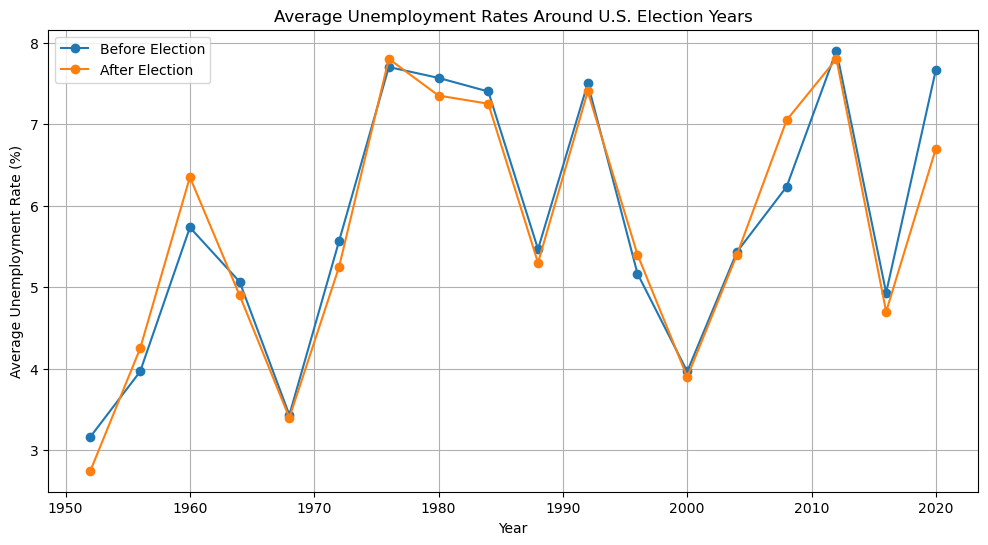

In [44]:
# Remove rows with None values to clean up the data for plotting
average_unemployment_clean = average_unemployment.dropna()

# Plotting
plt.figure(figsize=(12, 6), facecolor='white')
plt.plot(average_unemployment_clean['Year'], average_unemployment_clean['Before Election'], label='Before Election', marker='o')
plt.plot(average_unemployment_clean['Year'], average_unemployment_clean['After Election'], label='After Election', marker='o')
plt.title('Average Unemployment Rates Around U.S. Election Years')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

**Inferences**
*   In most cases the 13 out of 18 times the unemployment level seem to be less after the election than before the election
*   Thus indicating that unemployment reduces after elections

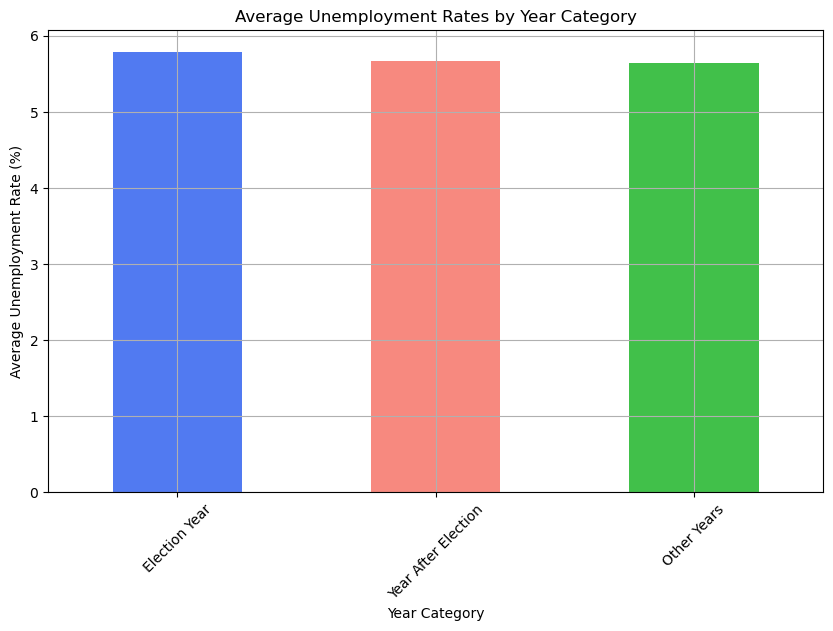

In [45]:
# Calculate average unemployment rates for each year in the dataset
df['Average'] = df.iloc[:, 1:].mean(axis=1)

# Categorize years based on election year, year after election, and other years
df['Category'] = 'Other Years'
df.loc[df['Year'].isin(election_years), 'Category'] = 'Election Year'
df.loc[df['Year'].isin([year + 1 for year in election_years]), 'Category'] = 'Year After Election'

# Group by category and calculate average unemployment rate for each category
category_averages = df.groupby('Category')['Average'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
category_averages.plot(kind='bar', color=['#517AF1', '#F7897F', '#41C04A'])
plt.title('Average Unemployment Rates by Year Category')
plt.xlabel('Year Category')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Comparing the average employment rates during the elction year, year after elction and other years it indicates that the unemployment was usually higher during the election year than the others.

In [46]:
# Calculate the average unemployment rate 6 months before and after the election month (November)
# Election month is November, so we consider May to October for before and December to May for after
# Load the data
file_path = 'unemployment_monthly levels.xlsx'
df = pd.read_excel(file_path)

# Election years
election_years = [year for year in range(1952, 2024, 4)]

# Calculate averages
six_month_avgs = []
for year in election_years:
    year_data = df[df['Year'] == year]
    avg_before = year_data[['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']].mean(axis=1).values[0]
    # For after, we need to handle the year transition
    if year + 1 in df['Year'].values:
        next_year_data = df[df['Year'] == year + 1]
        avg_after = next_year_data[['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']].mean(axis=1).values[0]
    else:
        avg_after = np.nan  # In case the next year's data is not available
    six_month_avgs.append({'Year': year, 'Before Election': avg_before, 'After Election': avg_after})

# Convert to DataFrame
six_month_avgs_df = pd.DataFrame(six_month_avgs)
print(six_month_avgs_df.head())

   Year  Before Election  After Election
0  1952         3.116667        2.966667
1  1956         4.150000        4.166667
2  1960         5.533333        6.750000
3  1964         5.066667        4.683333
4  1968         3.533333        3.416667


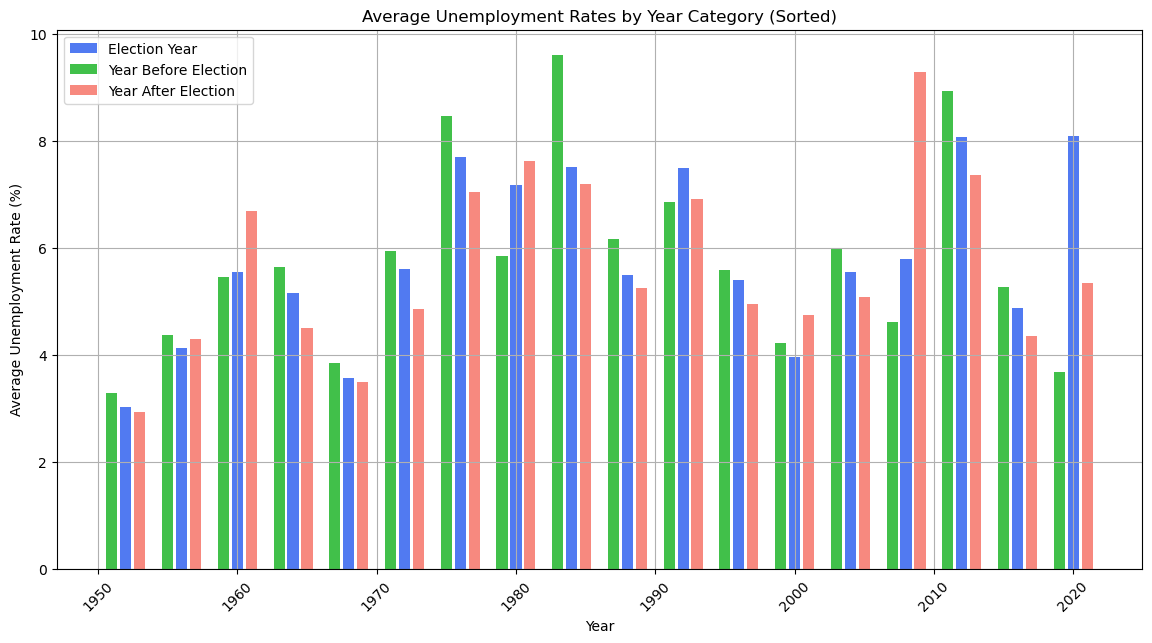

In [47]:
# Load the data from the Excel file
unemployment_data = pd.read_excel('unemployment_monthly levels.xlsx')

# Calculate the average unemployment rate for each year
unemployment_data['Average'] = unemployment_data.iloc[:, 1:].mean(axis=1)

# Define election years and categorize years
election_years = [1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
unemployment_data['Year Category'] = 'Other Years'
unemployment_data.loc[unemployment_data['Year'].isin(election_years), 'Year Category'] = 'Election Year'
unemployment_data.loc[unemployment_data['Year'].isin(np.array(election_years) - 1), 'Year Category'] = 'Year Before Election'
unemployment_data.loc[unemployment_data['Year'].isin(np.array(election_years) + 1), 'Year Category'] = 'Year After Election'

# Set up the color mapping for each category
colors = {'Election Year': '#517AF1', 'Year Before Election': '#41C04A', 'Year After Election': '#F7897F'}

# Sort the data by average unemployment rate in descending order
sorted_data = unemployment_data.sort_values(by='Average', ascending=False)
# Create the bar chart with sorted data
plt.figure(figsize=(14, 7), facecolor='white')
for category, color in colors.items():
    subset = sorted_data[sorted_data['Year Category'] == category]
    plt.bar(subset['Year'], subset['Average'], color=color, label=category)

plt.title('Average Unemployment Rates by Year Category (Sorted)')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


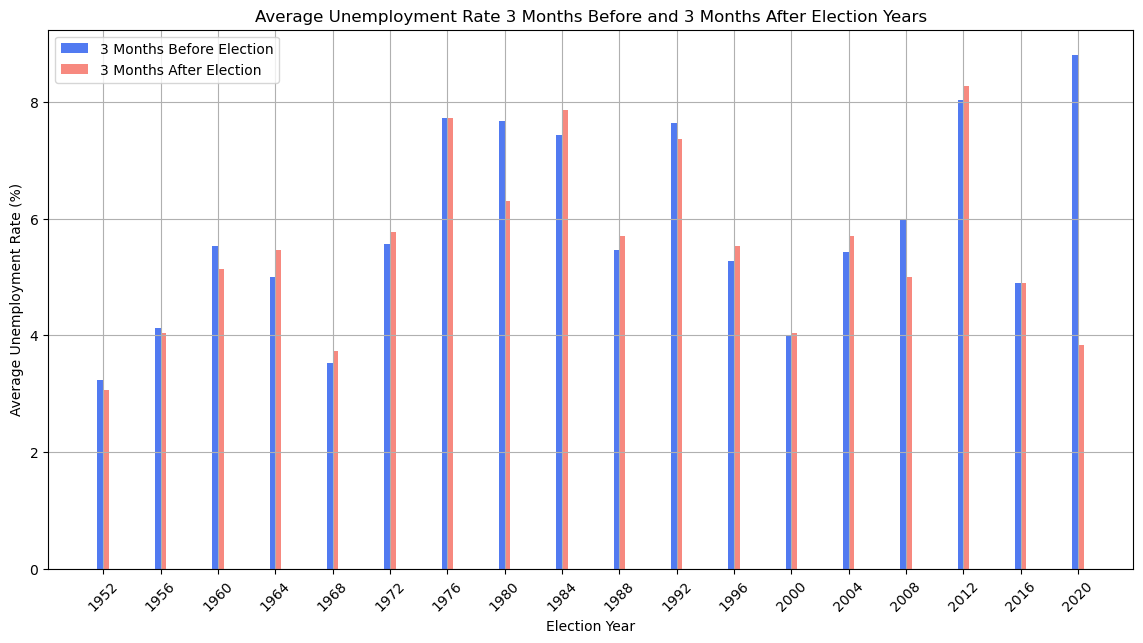

In [48]:
averages = []
for year in election_years:
    # Three months before
    if year in unemployment_data['Year'].values:
        three_months_before = unemployment_data.loc[unemployment_data['Year'] == year, 'Jul':'Sep'].mean().mean()
    else:
        three_months_before = np.nan  # Handle cases where the data for the year might not be available

    # Three months after
    if year in unemployment_data['Year'].values:
        three_months_after = unemployment_data.loc[unemployment_data['Year'] == year, 'Jan':'Mar'].mean().mean()
    else:
        three_months_after = np.nan  # Handle cases where the data for the year might not be available

    averages.append({'Year': year, 'Average 3 Months Before': three_months_before, 'Average 3 Months After': three_months_after})

# Convert to DataFrame
averages_df = pd.DataFrame(averages)

# Plotting
plt.figure(figsize=(14, 7), facecolor='white')
plt.bar(averages_df['Year']-0.2, averages_df['Average 3 Months Before'], width=0.4, label='3 Months Before Election', color='#517AF1')
plt.bar(averages_df['Year']+0.2, averages_df['Average 3 Months After'], width=0.4, label='3 Months After Election', color='#F7897F')
plt.title('Average Unemployment Rate 3 Months Before and 3 Months After Election Years')
plt.xlabel('Election Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(election_years, rotation=45)
plt.legend()
plt.grid(True)
plt.show()